### AYUSH RANJAN
### 1901CS11
### CS564
### ASSIGNMENT 1

##OVERVIEW

###1.Importing libraries and packages and data.
###2.(Country-data.csv)Data description and distribution.
###3.Evaluating and reducing data.
###4.APPLYING K-MEANS CLUSTERING.
###5.Cluster analysis.
###6.APPLYING K-Medoids Clustering
###7.results
###8.refrence.



###  Importing libraries and packages and data</a>

In [101]:
!pip install geopandas
!pip install geoplotlib
!pip install geoplot
!pip install scikit-learn-extra

import os
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# pca
from sklearn.decomposition import PCA

# kmeans/KMediod clustering 
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# multivariate linear regression
from sklearn import linear_model

# geo data
import geopandas as gpd
from geopandas import GeoDataFrame as gdf
import plotly.express as px
import geoplot
import mapclassify

data_path = '.'
data = pd.read_csv(
    f'{data_path}/Country-data.csv')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##  (Country-data.csv)Data description and distribution</a>

### About data</a>

**Feature Description** 

* country:      Name of the country

* child_mort:   Death of children under 5 years of age per 1000 live births

* exports:      Exports of goods and services per capita. Given as %age of the GDP per capita

* health:       Total health spending per capita. Given as %age of GDP per capita

* imports:      Imports of goods and services per capita. Given as %age of the GDP per capita

* Income:       Net income per person

* Inflation:    The measurement of the annual growth rate of the Total GDP

* life_expec:   The average number of years a new born child would live if the current mortality patterns are to remain the same

* total_fer:    The number of children that would be born to each woman if the current age-fertility rates remain the same

* gdpp:         The GDP per capita. Calculated as the Total GDP divided by the total population

In [8]:
# how many columns and rows in dataframe
data.shape
# are there any missing values?
data.isnull().sum()
# are there duplicate values?
format(len(data[data.duplicated()]))
# standard statistical measures
data.describe(percentiles = [.25, .5, .75, .90 ,.95, .99])

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
90%    100.220000   70.800000   10.940000   75.420000   41220.000000   
95%    116.000000   80.570000   11.570000   81.140000   48290.000000   
99%    153.400000  160.480000   13.474000  146.080000   84374.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

**Observations:**

* no missing or duplicate values
* some outliers and skewed distribution

### Data distribution</a>

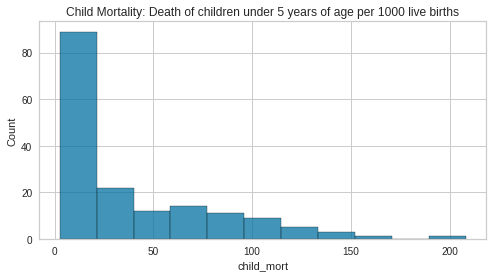

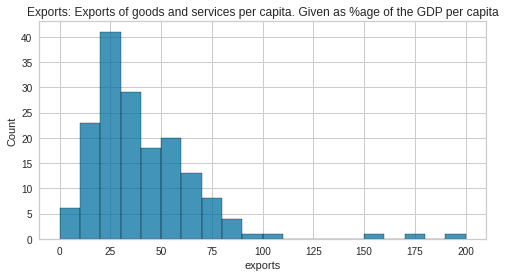

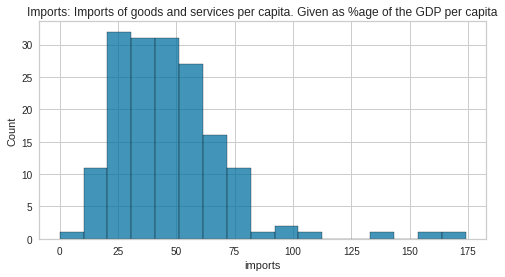

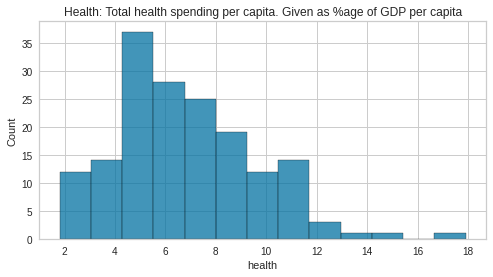

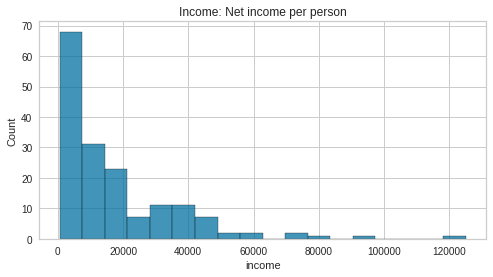

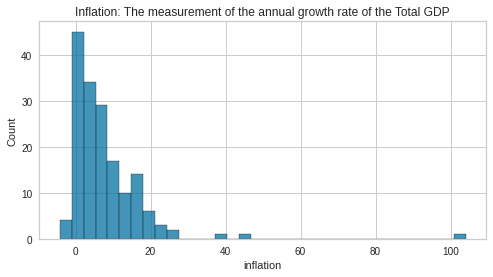

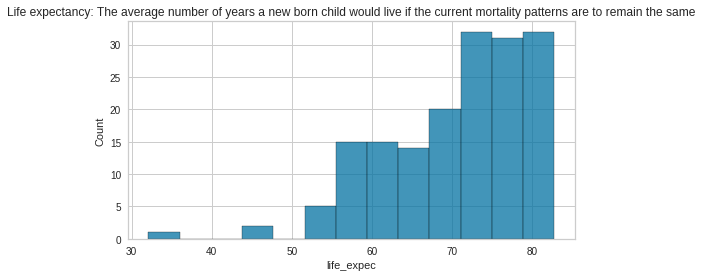

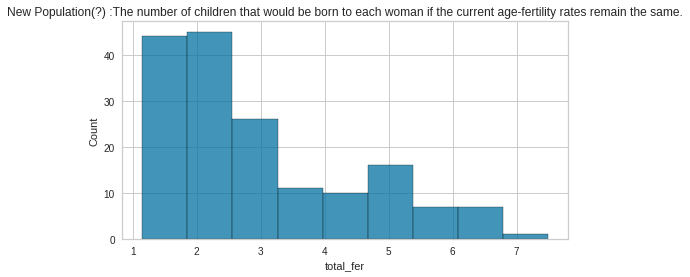

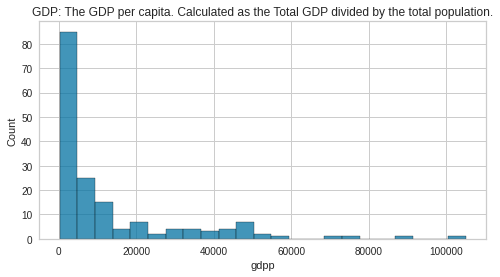

In [11]:
plt.figure(figsize=(8,4))
plt.title("Child Mortality: Death of children under 5 years of age per 1000 live births")
ax = sns.histplot(data["child_mort"])

plt.figure(figsize=(8,4))
plt.title("Exports: Exports of goods and services per capita. Given as %age of the GDP per capita")
ax = sns.histplot(data["exports"])

plt.figure(figsize=(8,4))
plt.title("Imports: Imports of goods and services per capita. Given as %age of the GDP per capita")
ax = sns.histplot(data["imports"])

plt.figure(figsize=(8,4))
plt.title("Health: Total health spending per capita. Given as %age of GDP per capita")
ax = sns.histplot(data["health"])

plt.figure(figsize=(8,4))
plt.title("Income: Net income per person")
ax = sns.histplot(data["income"])

plt.figure(figsize=(8,4))
plt.title("Inflation: The measurement of the annual growth rate of the Total GDP")
ax = sns.histplot(data["inflation"])

plt.figure(figsize=(8,4))
plt.title("Life expectancy: The average number of years a new born child would live if the current mortality patterns are to remain the same")
ax = sns.histplot(data["life_expec"])

plt.figure(figsize=(8,4))
plt.title("New Population(?) :The number of children that would be born to each woman if the current age-fertility rates remain the same.")
ax = sns.histplot(data["total_fer"])

plt.figure(figsize=(8,4))
plt.title("GDP: The GDP per capita. Calculated as the Total GDP divided by the total population.")
ax = sns.histplot(data["gdpp"])

**Observation:**

* Looking at the data distribution we can see that there are some features that have outliers but we will not remove the outliers as they wiil be helpful.

 

## Evaluating and reducing data

### Correlation
####observing correlations

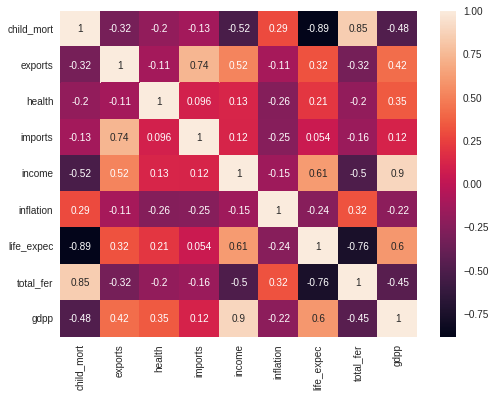

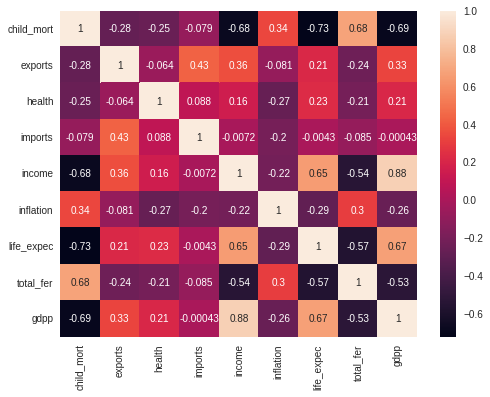

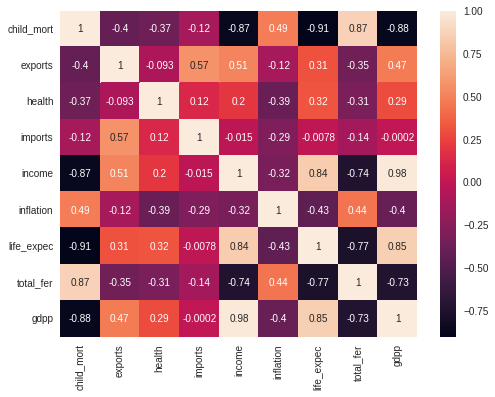

In [13]:
# pearson
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(method='pearson', min_periods=1),annot=True)

# kendall
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(method='kendall', min_periods=1),annot=True)

# spearman
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(method='spearman', min_periods=1),annot=True)

**Observations:** 


After looking at Pearson, Kendall and Spearman correlation, we can see that there are a few features that might be considered for elimination due to high correlation.

- life_expect, due to high correlation with child mortality
- total_fertility, due to high correlation with child mortality
- income, due to high correlation with gdpp


### Scaling


* The features have incomparable units (metrics are percentages, dollar values, whole numbers), thus by scaling we are removing potential bias that the model can have towards features with higher magnitudes


In [14]:
# eliminate the column that contains the country information, as only numeric values should be used in this case for unsupervised learning
dataset = data.drop(['country'], axis =1)
dataset_=copy.deepcopy(dataset)
dataset.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

#### Scale the data: MinMaxScaler (normalised)

In [16]:
# columns argument ==> we'll use this later to create a new dataframe with the rescaled data 
columns = dataset.columns

# the scaler to use will be 
scaler = MinMaxScaler()

# 'scaler' is for the rescaling technique, 'fit' function is to find the x_min and the x_max, 'transform' function applies formula to all elements of data
rescaled_dataset_minmax = scaler.fit_transform(dataset)

#### Scale the data: StandardScaler (standardised)

In [18]:
# in standardisation, all features will be transformed to have the properties of standard normal distribution with mean=0 and standard deviation=1
# 
# columns argument ==> we'll use this later to create a new dataframe with the rescaled data 
columns = dataset.columns

# the scaler to use will be 
scaler = StandardScaler()

# 'scaler' is for the rescaling technique, 'fit' function is to find the x_min and the x_max, 'transform' function applies formula to all elements of data
rescaled_dataset_standard = scaler.fit_transform(dataset)

#### Scaled dataframes

In [19]:
# minmax
# we need to create a new dataframe with the column lables and the rescaled values 
df_minmax = pd.DataFrame(data= rescaled_dataset_minmax , columns = columns )
df_minmax_=pd.DataFrame(data= rescaled_dataset_minmax , columns = columns )


In [20]:
# standardisation
# we need to create a new dataframe with the column lables and the rescaled values 
df_standard = pd.DataFrame(data= rescaled_dataset_standard , columns = columns)
df_standard_ = pd.DataFrame(data= rescaled_dataset_standard , columns = columns)

#### Comparing scaling methods

Text(0, 0.5, 'Child Mortality')

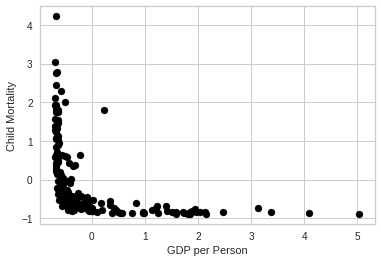

In [23]:
plt.scatter(df_standard['gdpp'], df_standard['child_mort'],color = 'black')
plt.scatter

plt.xlabel('GDP per Person')
plt.ylabel('Child Mortality')



### PCA [ Principal Component Analysis ]

#### PCA with data scaled with StandardScaler

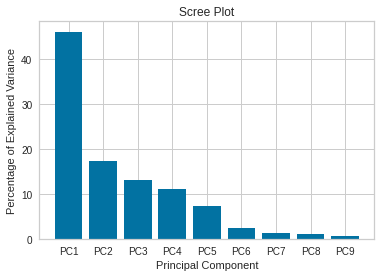

Text(0, 0.5, 'PC2 - 17.2%')

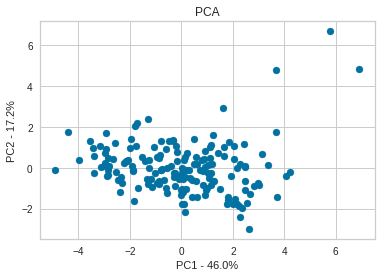

In [27]:
# import PCA 
from sklearn.decomposition import PCA

# fit and transform
pca = PCA()
pca.fit(df_standard)
pca_data_standard = pca.transform(df_standard)

# percentage variation 
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# plot pca
pca_df_standard = pd.DataFrame(pca_data_standard, columns = labels)
plt.scatter(pca_df_standard.PC1, pca_df_standard.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

#### PCA with data scaled with MinMaxScaler

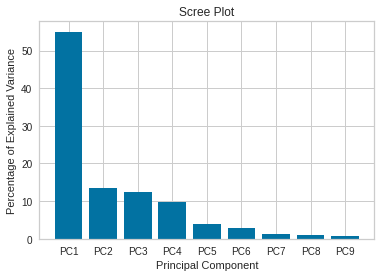

Text(0, 0.5, 'PC2 - 13.4%')

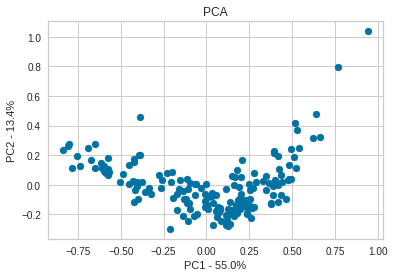

In [28]:

# fit and transform
pca = PCA()
pca.fit(df_minmax)
pca_data_minmax = pca.transform(df_minmax)

# percentage variation 
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

# plot pca

pca_df_minmax = pd.DataFrame(pca_data_minmax, columns = labels)
plt.scatter(pca_df_minmax.PC1, pca_df_minmax.PC2)
plt.title('PCA')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

In [29]:
# dataframe with PC1, PC2, P3, PC4
data2 = pca_df_standard.drop(['PC5','PC6','PC7','PC8','PC9'], axis = 1)
data2_=copy.deepcopy(data2)

**Observation:**

* After doing PCA with both standardised and normalised versions of the original dataset, we can see that there are 4 principal components can explain about 90% of the distribution of the original data.


## APPLYING K-MEANS CLUSTERING

### Setting up the model

In [30]:
km = KMeans (
    n_clusters = 3, # number of clusters/centroids to create
    init = 'random', # ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids
    n_init = 10, # this is the default value. This is the number of times the k-means algorithm will be run with different centroid seeds
    max_iter = 300, # this is the default value. This is the maximum number of iterations of the k-means algorithm for a single run.
    tol = 1e-4, # this is the default value. This is the relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence.
    random_state = 0 # this is the default value. Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
)

#### Run model with different versions of the dataset

In [39]:
# normalised dataset
# method to compute the clusters and assign the labels
y_predicted_minmax = km.fit_predict(df_minmax)

y_predicted_standard = km.fit_predict(df_standard)
y_predicted_data2 = km.fit_predict(data2)
df_minmax['cluster'] = y_predicted_minmax
df_minmax.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  cluster  
0   1.902882 -0.679180        1  
1  -0.859973 -0.485623        0  
2  -0.038404 -0.465376        0  
3   2.128151 -0.516268        1  
4  -0.541946 -0.041817        0

In [41]:
# add the cluster column to the dataframe 
df_standard['cluster'] = y_predicted_standard
df_standard.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  cluster  
0   1.902882 -0.679180        1  
1  -0.859973 -0.485623        0  
2  -0.038404 -0.465376        0  
3   2.128151 -0.516268        1  
4  -0.541946 -0.041817        0

In [42]:
# add the cluster column to the dataframe (dataset does not include feature 'country')
dataset['cluster'] = y_predicted_data2
dataset.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  cluster  
0       5.82    553        1  
1       1.65   4090        0  
2       2.89   4460        0  
3       6.16   3530        1  
4       2.13  12200        0

### Optimal number of clusters(Elbow method)

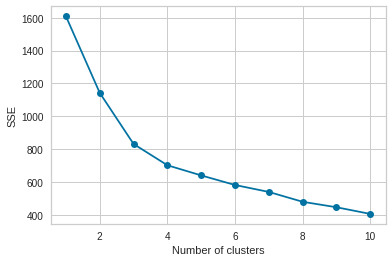

In [43]:
# calculate Sum of Squared Errors (SSE), also called distorsions,  for a range of number of cluster - with df scaled with StandardScaler

sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_standard)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

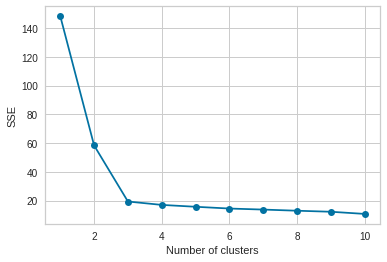

In [44]:
# calculate Sum of Squared Errors (SSE), also called distorsions, for a range of number of cluster - with df scaled with MinMax

sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_minmax)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

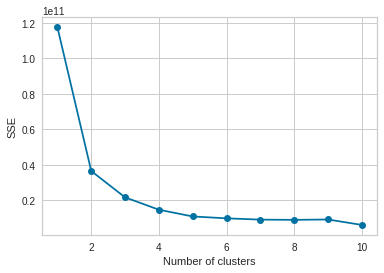

In [45]:
# calculate Sum of Squared Errors (SSE), also called distorsions, for a range of number of cluster - with df scaled with StandardScaler + PCA
sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(dataset)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

**OBSERVATIONS:**

* After running the K-Means model with the a normalised dataset, a standardised dataset, and a PCA with 4 components (with standardised scaling) 
* we can see that the optimal number of clusters is still 3 with different levels of inertia.

### Optimal number of clusters(Silhouette Method)

#### With standardised data



In [46]:
# calculate Silhoutte Score - stardardised
score = silhouette_score(df_standard, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)
# A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. 

Silhouette Score: 0.017


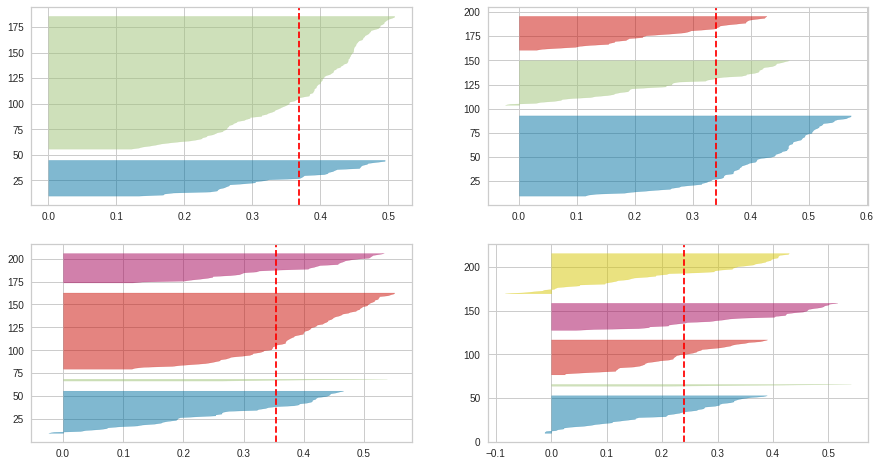

In [47]:
fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    km = KMeans(n_clusters=i, init= 'random', n_init =10, max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)
    
    #create visualiser
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_standard)

#### With normalised data

In [48]:
# Calculate Silhoutte Score - normalised
score = silhouette_score(df_minmax, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

# # A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. 

Silhouette Score: 0.336


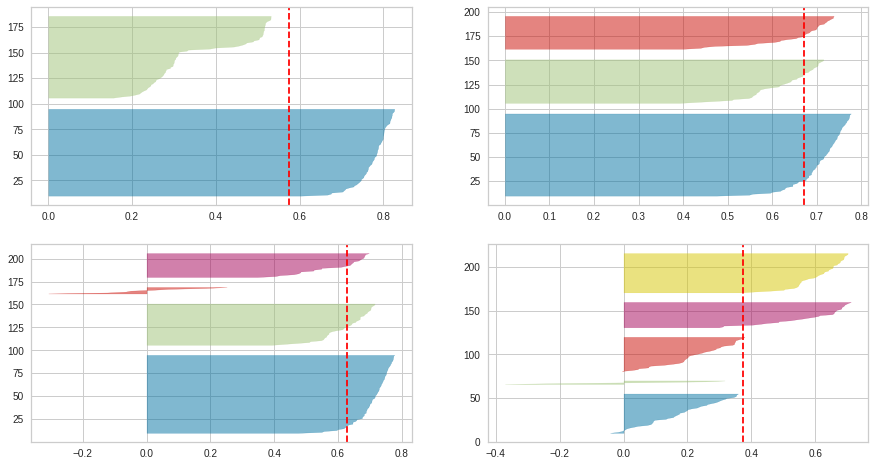

In [49]:
fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    km = KMeans(n_clusters=i, init= 'random', n_init =10, max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)
    
    #create visualiser
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_minmax)

#### With standardised data + PCA

In [50]:
# Calculate Silhoutte Score - stardardised + PCA
score = silhouette_score(dataset, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

# A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. 

Silhouette Score: 0.174


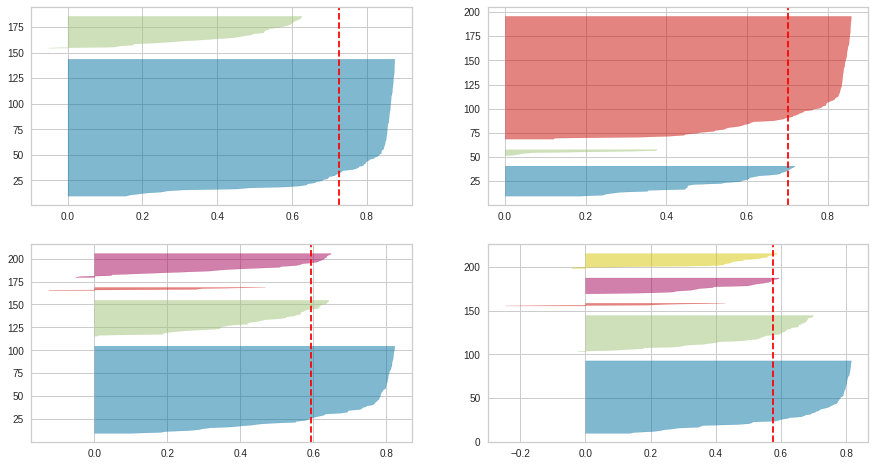

In [51]:
fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    km = KMeans(n_clusters=i, init= 'random', n_init =10, max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)
    
    #create visualiser
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(dataset)

**Observations:**

* Silhouette Scores are very close to 0 indicating that clusters are overlapping. An increase in clusters (to 5 for example) shows that there are negative values in the scale, meaning that this n of clusters might have samples that have been assigned to the wrong cluster.



## Cluster analysis</a>

### Cluster plotting and visualisation</a>

#### Visualise clusters by feature, scaled data with StandardScaler (standardisation)

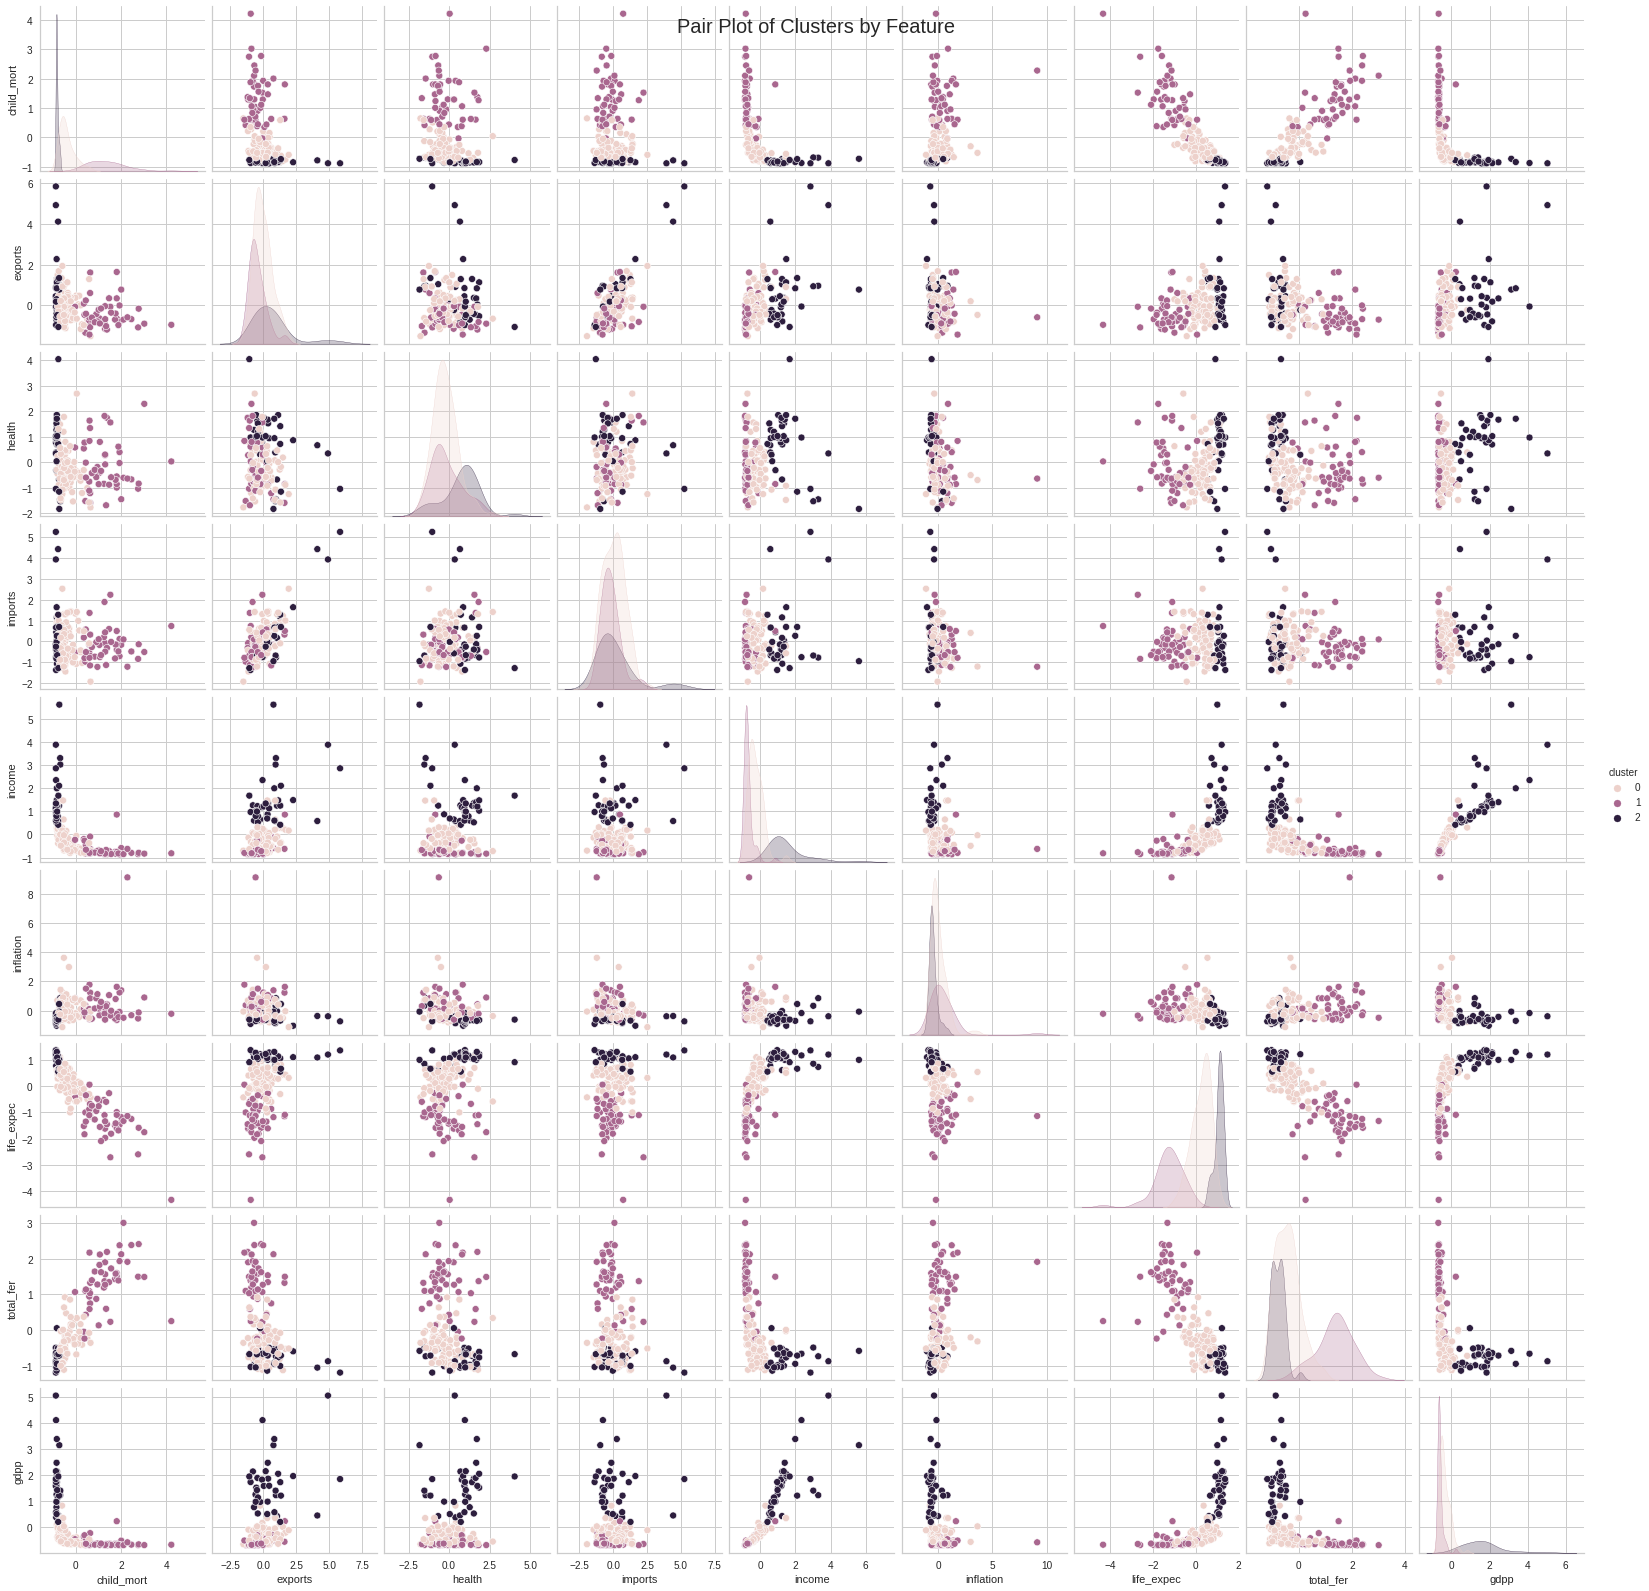

In [53]:

# plot
sns.pairplot(df_standard, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

#### Visualise clusters by feature, scaled data with MinMaxScaler (normalisation)

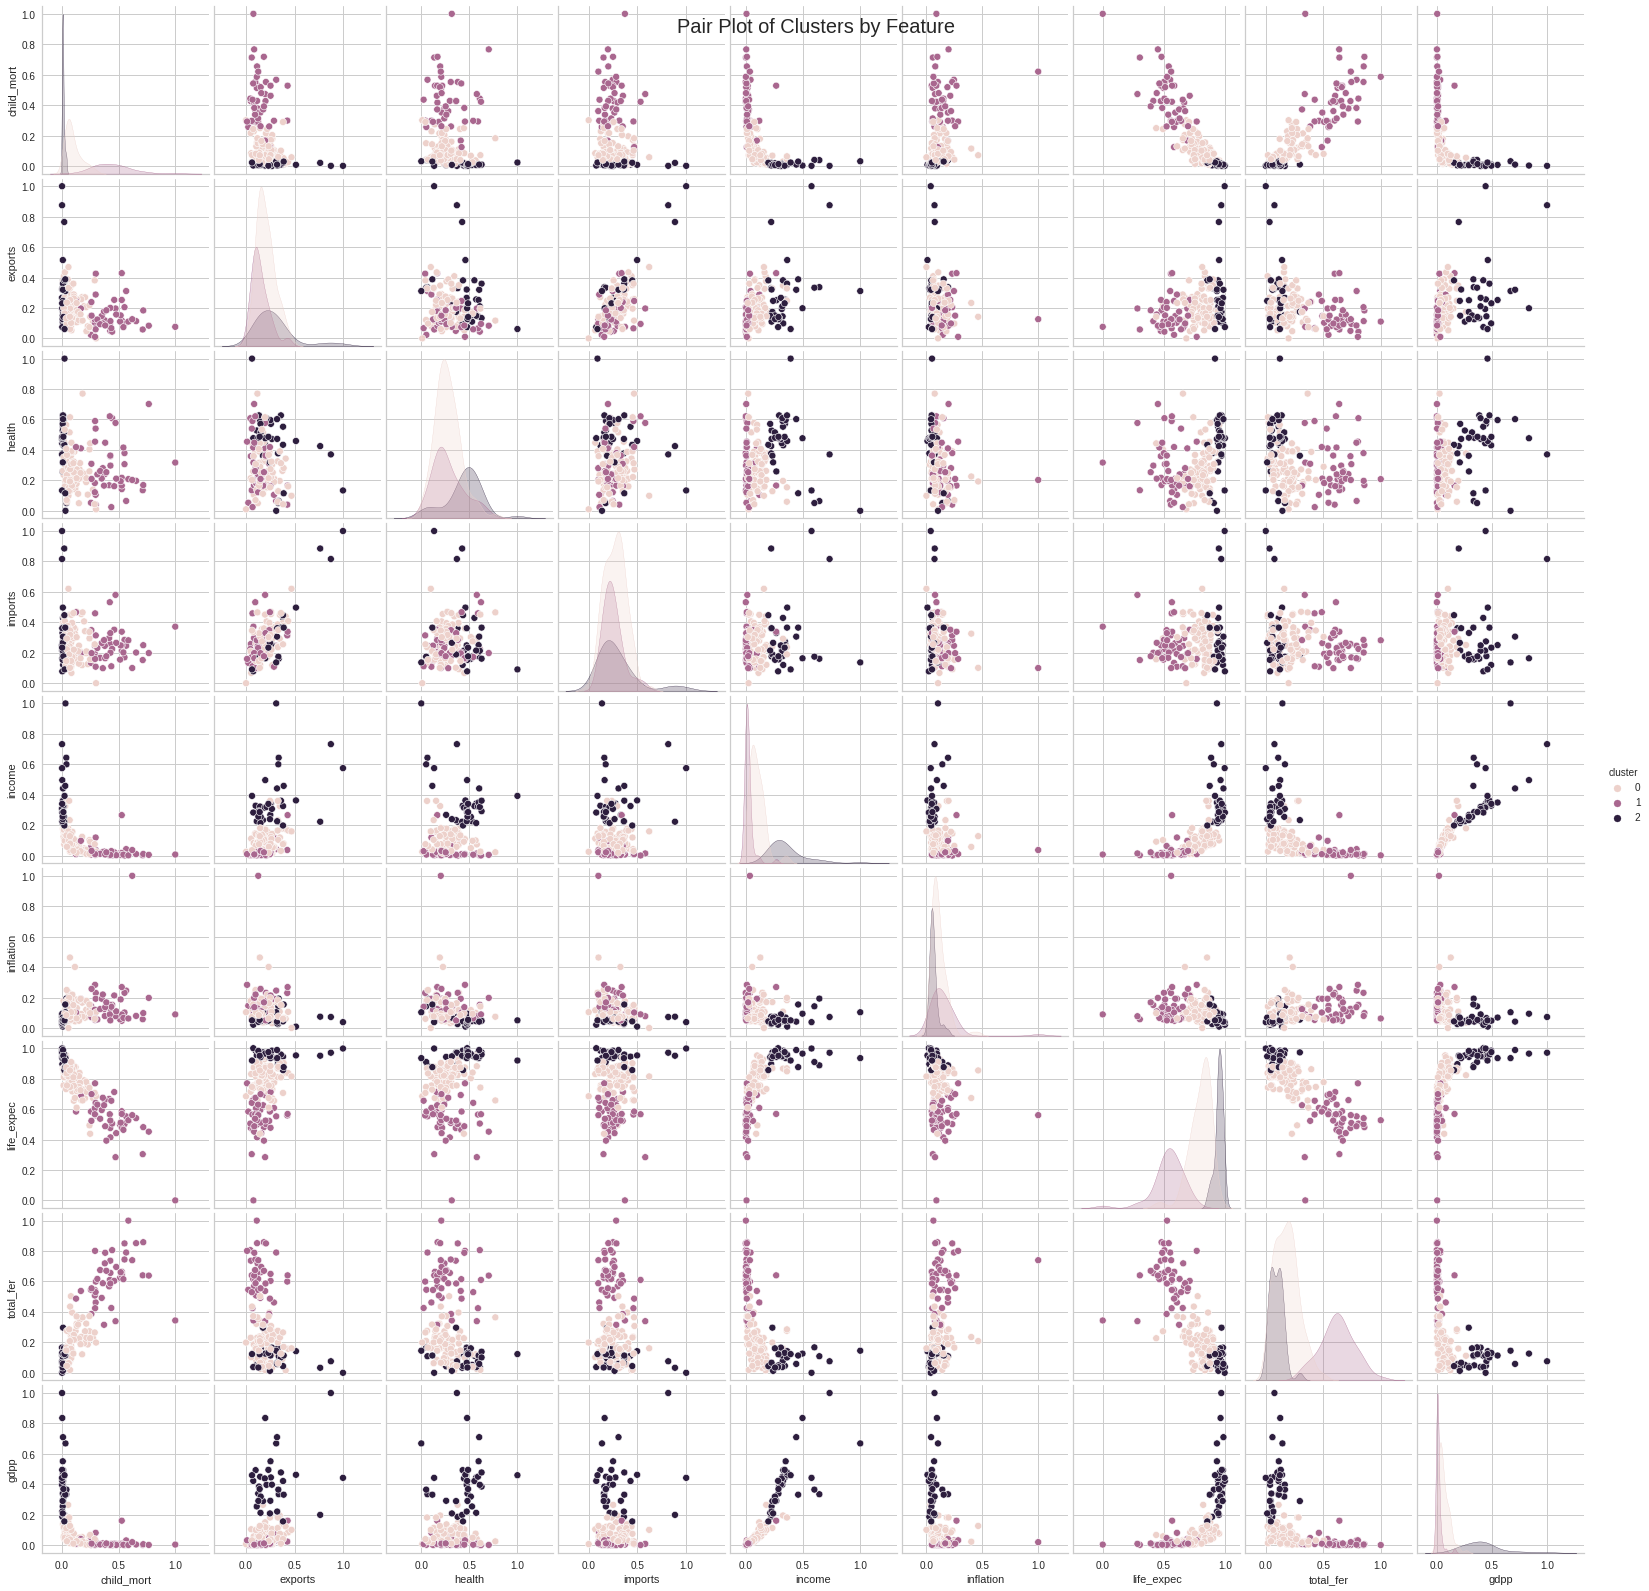

In [54]:
# plot
sns.pairplot(df_minmax, hue="cluster")
# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

#### Visualise clusters by feature, scaled data with StandardScaler and with reduction of features with PCA

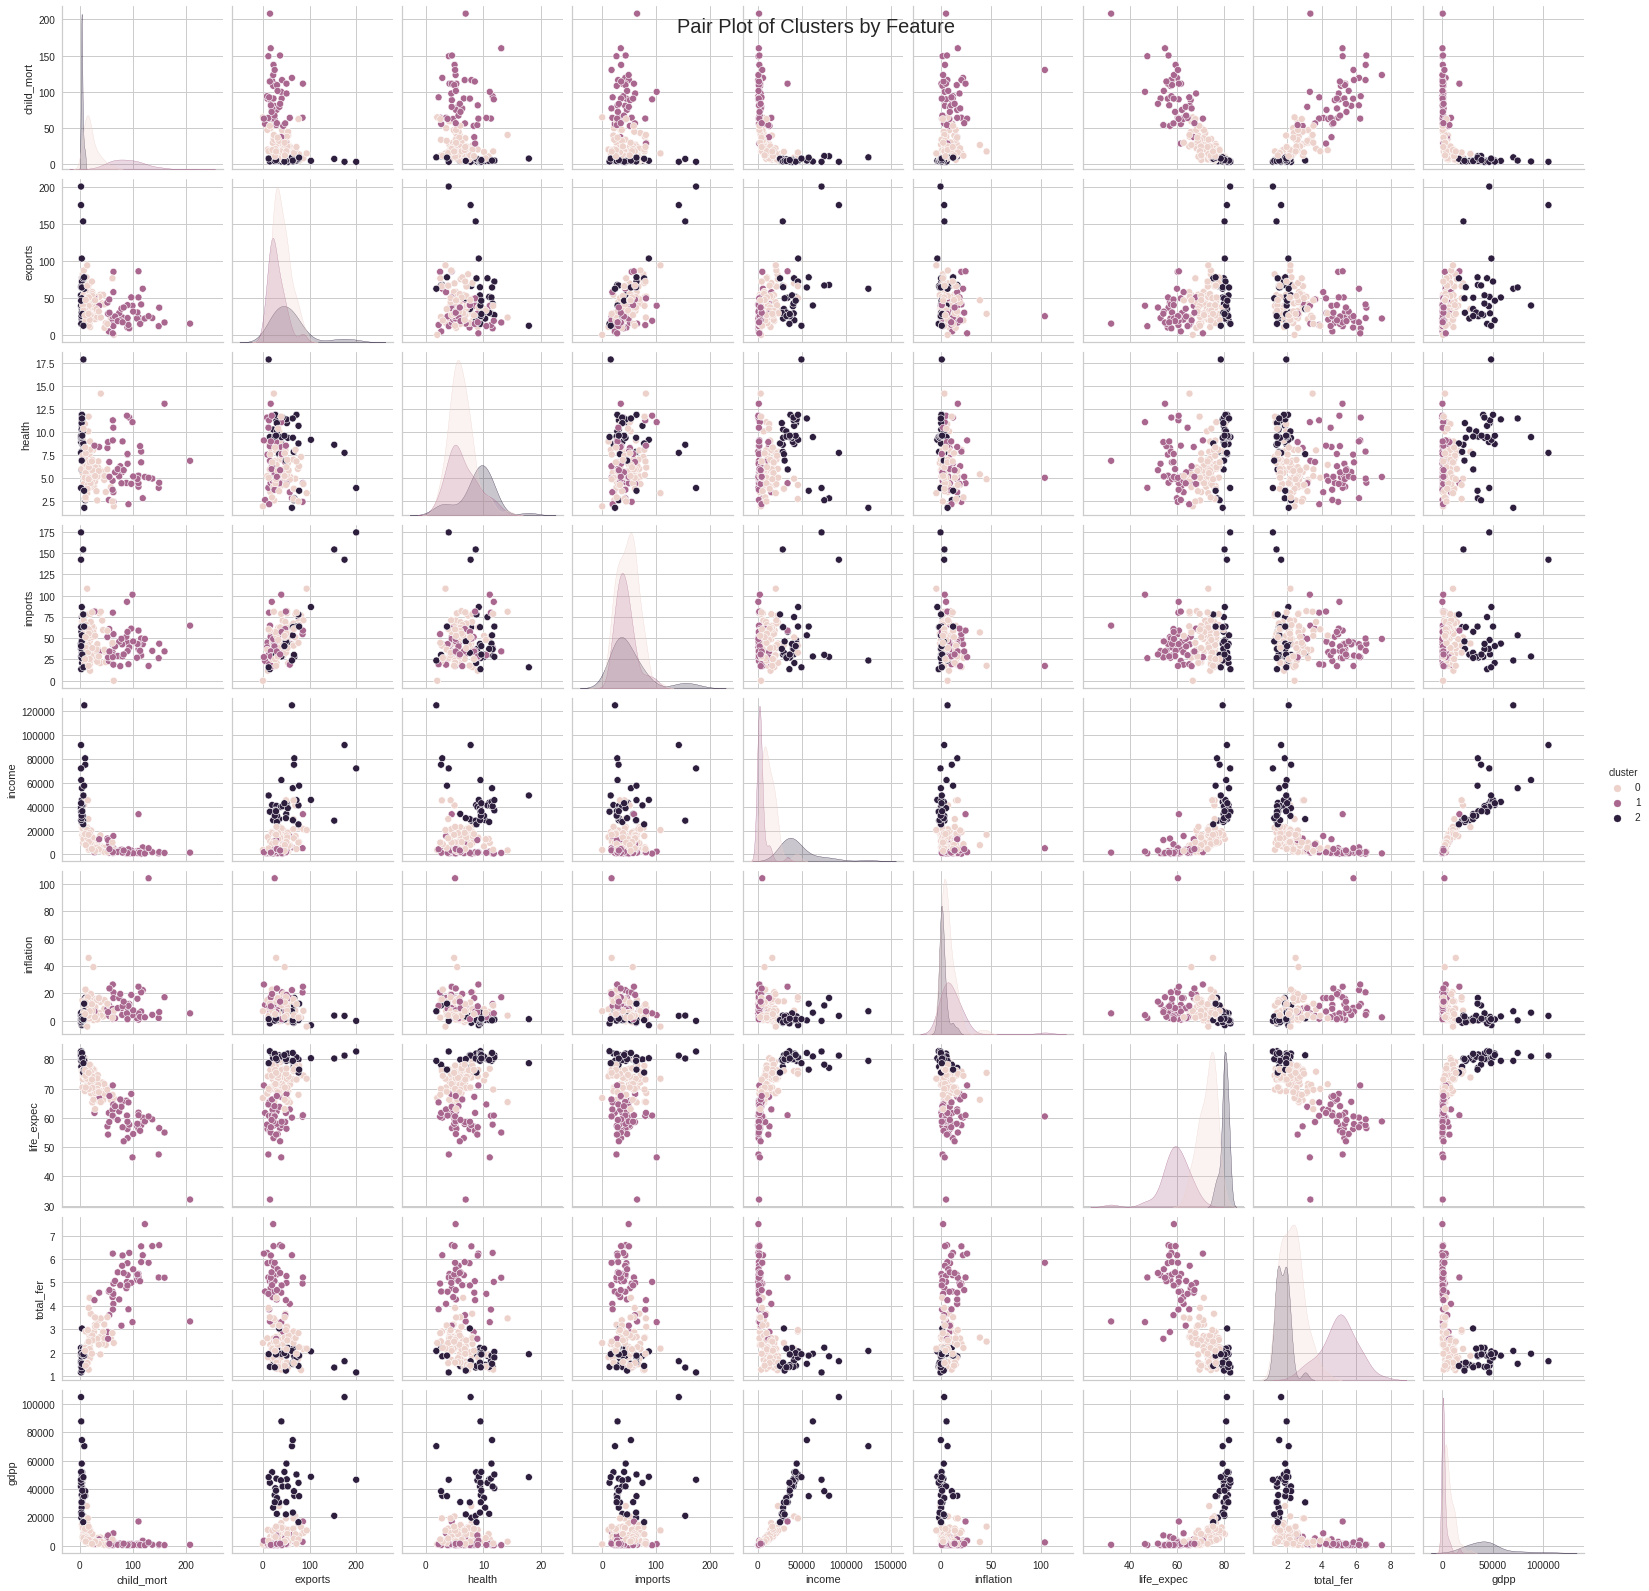

In [55]:
# plot
sns.pairplot(dataset, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

*observations:**

After running the model with 2 types of scaling and using PCA, we can see there tends to be overlapping between clusters.

### Cluster characteristics

In [56]:
# add cluster column to original dataset with countries and non-scaled values
data['cluster'] = y_predicted_standard.tolist()

#### Visualise clusters by feature, original data with no scaling

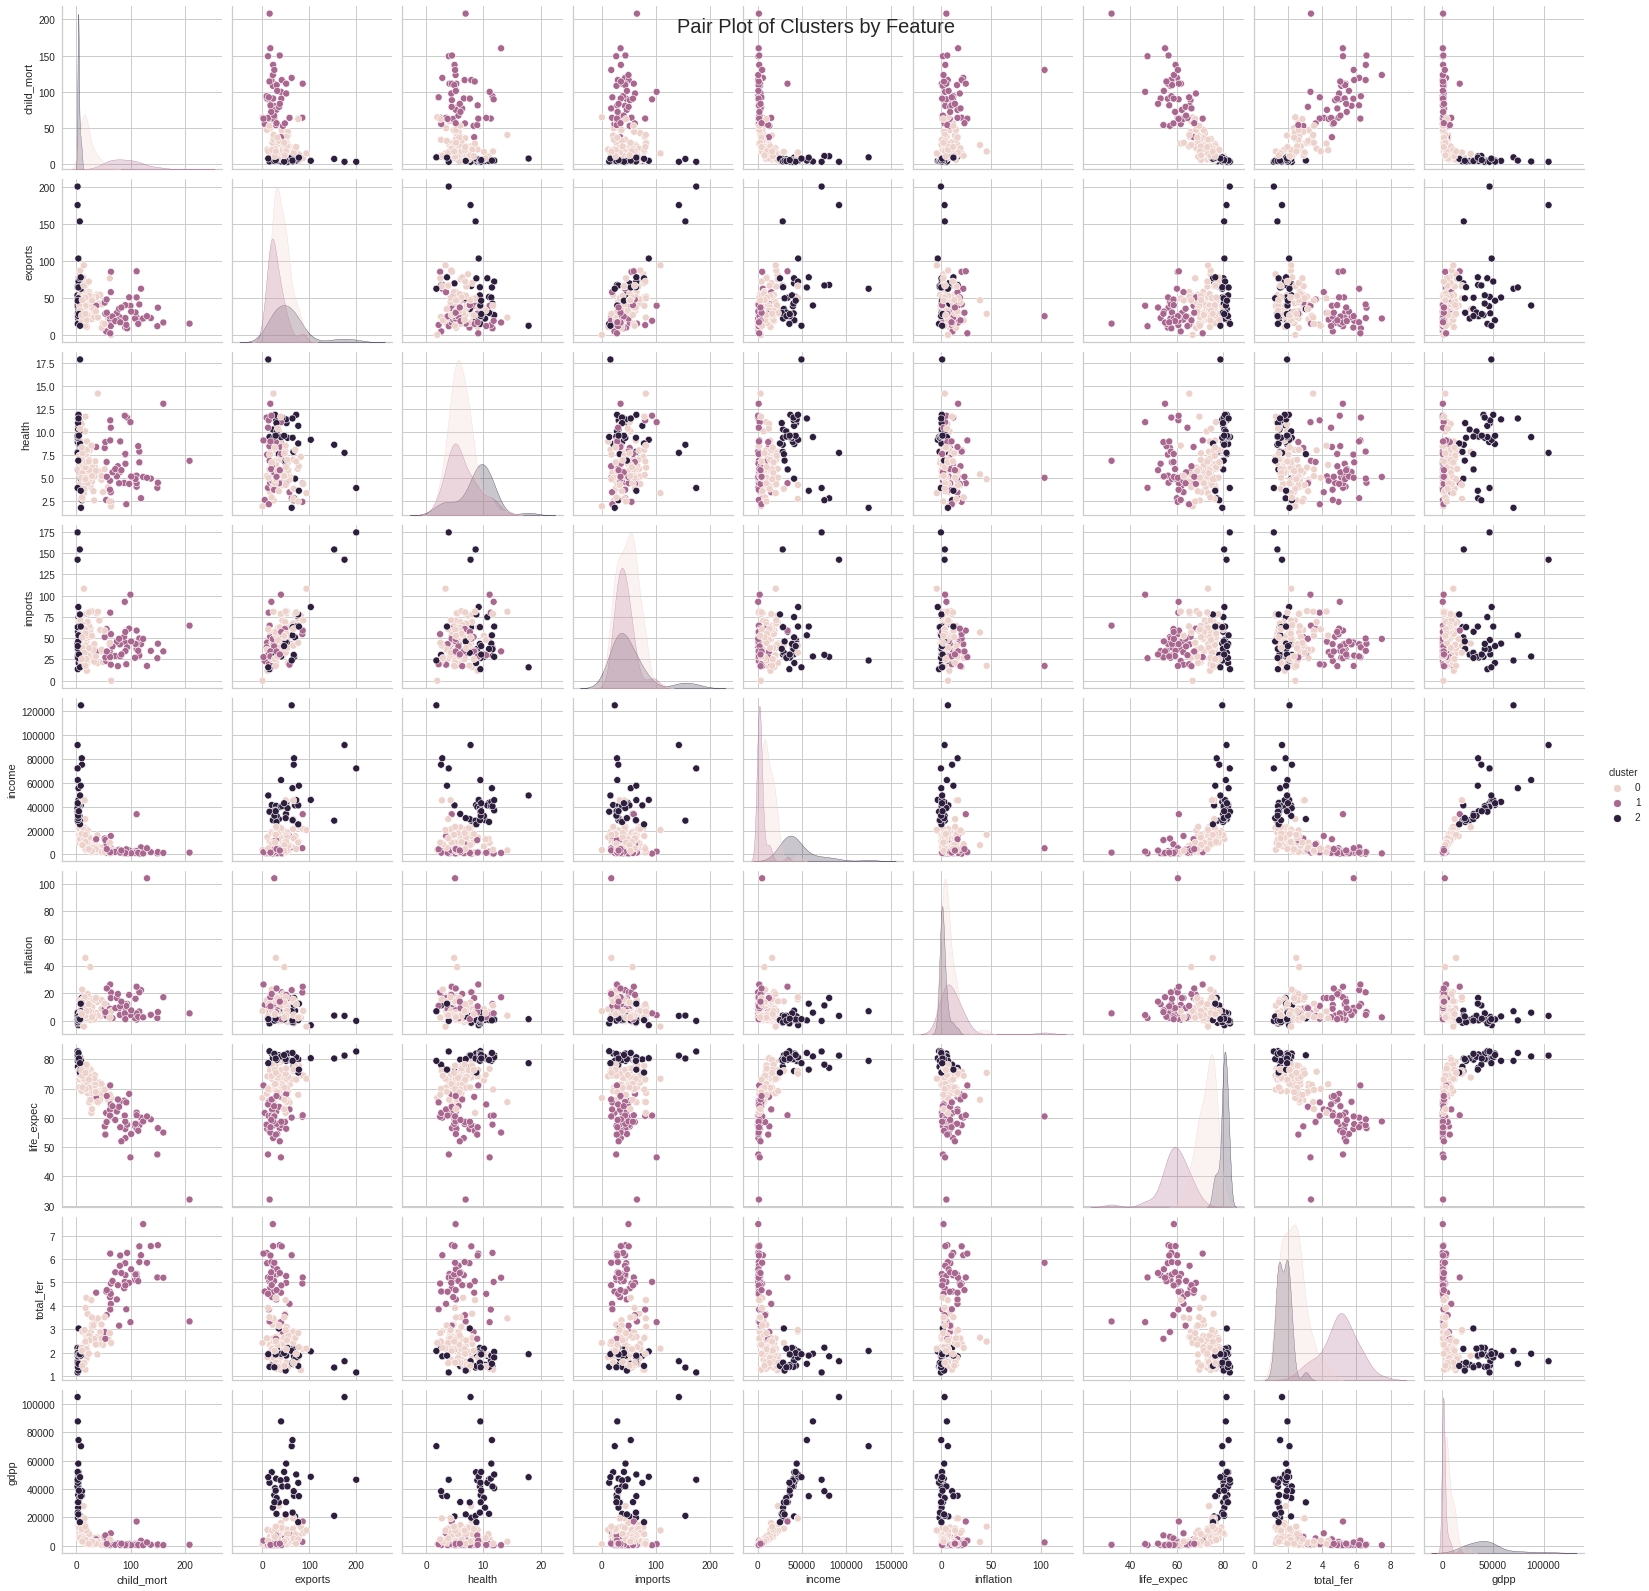

In [57]:
# # load example dataset from seaborn 
# sns.get_dataset_names()

# # load dataset
# sns.load_dataset('iris')
# # plot
sns.pairplot(data, hue="cluster")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

###Cluster descriptions

In [61]:
# table of clusters showing mean values per cluster and per feature
clusters_table = pd.pivot_table(data, index=['cluster'])

In [62]:
# cluster 0 
cluster_0 = data.loc[data['cluster'] == 0]
# list of countries in this country
# cluster_0.country.unique()

In [63]:
# cluster 1 
cluster_1 = data.loc[data['cluster'] == 1]

# list of countries in this country
# cluster_1.country.unique()

In [64]:
# cluster 2 
cluster_2 = data.loc[data['cluster'] == 2]

# list of countries in this country
# cluster_2.country.unique()

###Clusters and their location in the world

In [65]:
# load example data from geodataframe 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world.head()

In [66]:
# look at country names from gpd list
print(sorted(world['name'].unique()))

# look at country names for analysis list
print(sorted(data['country'].unique()))

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', '

In [67]:
# compare 2 lists to idenitfy country names that need to be adjusted
world_list=sorted(world['name'].unique())
data_list = sorted(data['country'].unique())

list_difference = []
for item in world_list:
  if item not in data_list:
    list_difference.append(item)

print(list_difference)

['Antarctica', 'Bosnia and Herz.', 'Central African Rep.', 'Congo', 'Cuba', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Djibouti', 'Dominican Rep.', 'Eq. Guinea', 'Ethiopia', 'Falkland Is.', 'Fr. S. Antarctic Lands', 'Greenland', 'Honduras', 'Kosovo', 'Kyrgyzstan', 'Laos', 'Macedonia', 'Mexico', 'N. Cyprus', 'New Caledonia', 'Nicaragua', 'North Korea', 'Palestine', 'Papua New Guinea', 'Puerto Rico', 'S. Sudan', 'Slovakia', 'Solomon Is.', 'Somalia', 'Somaliland', 'Syria', 'Taiwan', 'Trinidad and Tobago', 'United States of America', 'W. Sahara', 'Zimbabwe', 'eSwatini']


In [68]:
# update names on world gdp dataset to match with df
world['name'] = world['name'].replace(
    ['Bosnia and Herz.', 'Central African Rep.', 'Congo', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Dominican Rep.', 'Eq. Guinea', 'Macedonia', 'Myanmar', 'N. Cyprus', 'S. Sudan', 'Slovakia', 'Solomon Is.', 'United States of America'],
    ['Bosnia and Herzegovina','Central African Republic','Congo, Rep.',"Cote d'Ivoire",'Congo, Dem. Rep.','Dominican Republic','Equatorial Guinea','Macedonia, FYR','Myanmar','Cyprus','Sudan','Slovak Republic','Solomon Islands','United States'])

# check output
# world.name.unique()

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


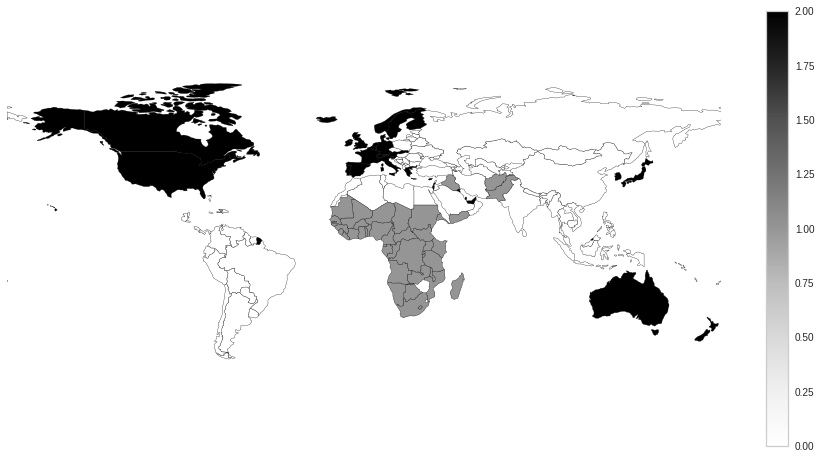

In [69]:
# change column name
world_copy = world.copy()
world_copy.rename(columns = {'name' : 'country'}, inplace = True)
world_copy.head()

# append geodataframe data with data_combined data
world_data = pd.merge(
        data,
        world_copy,
        on='country',
        how= 'inner'
)

# convert df into geodf
world_data = gdf(world_data)

# plot 
import geoplot
import mapclassify
cluster = world_data['cluster']


# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world_data, 
    hue=cluster,
    cmap='Greys', 
    figsize=(16, 8),
    legend = True
)

**Obervation: **

* Countries in Cluster 2 (characterised by showing really strong or positive values such as good economic development, high life expectancy, low child mortality) are located in North America, Europe, Oceania and a couple in Asia. 
* Countries in Cluster 1 (characterised by having the most negative values: high child mortality, lowest economic development) are located across Africa and Asia.
* Countries in Cluster 0 (characterised by showing average values for all features when comparing with other clusters) are located across South America, parts of Africa, Europe and Asia.

Blank spaces are of countries with no available data.

## APPLYING K-Medoids Clustering

### Setting up Model

In [70]:
k_medoid =  KMedoids (
    n_clusters = 3, # number of clusters/mediod to create
    init = 'random', # ‘random’: choose n_clusters observations (rows) at random from data for the initial centroids
    max_iter = 300, # this is the default value. This is the maximum number of iterations of the k-means algorithm for a single run.
    random_state = 0 # this is the default value. Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
)

#### Run model with different versions of the dataset

In [71]:
# normalised dataset
# method to compute the clusters and assign the labels
y_predicted_minmax_ = k_medoid.fit_predict(df_minmax_) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
# y_predicted_minmax_

In [72]:
# standardised dataset
# method to compute the medoid and assign the labels
y_predicted_standard_ = k_medoid.fit_predict(df_standard_) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
y_predicted_standard_

array([0, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 0,
       0, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2,
       0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1,
       0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 0])

In [73]:
# data2_ is the original dataset with standard scaling and 4 principal components found with PCA
# method to compute the medoid and assign the labels
y_predicted_data2_ = k_medoid.fit_predict(data2_) # fit_predict --> Compute cluster centers and predict cluster index for each sample.
# y_predicted_data2_

In [74]:
# add the cluster column to the dataframe 
df_minmax_['medoid'] = y_predicted_minmax_
# df_minmax_.head()

In [75]:
# add the cluster column to the dataframe 
df_standard_['medoid'] = y_predicted_standard_
# df_standard_.head()

In [76]:
# add the cluster column to the dataframe (dataset does not include feature 'country')
dataset_['medoid'] = y_predicted_data2_
# dataset_.head()

### Optimal number of clusters (Elbow Method)

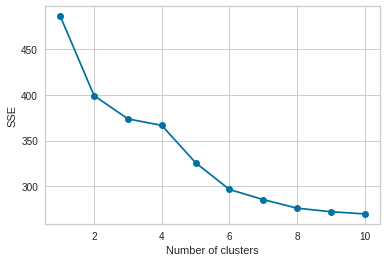

In [77]:
# calculate Sum of Squared Errors (SSE), also called distorsions,  for a range of number of cluster - with df scaled with StandardScaler

sse = []
for i in range(1, 11):
    k_medoid = KMedoids(
        n_clusters=i,
        init='random',
        max_iter=300,
        random_state=0
    )
    k_medoid.fit(df_standard_)
    sse.append(k_medoid.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

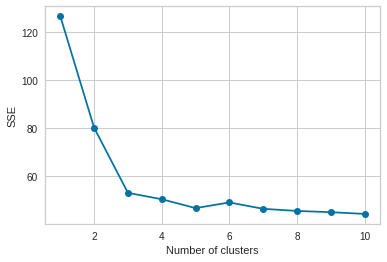

In [78]:
# calculate Sum of Squared Errors (SSE), also called distorsions, for a range of number of cluster - with df scaled with MinMax

sse = []
for i in range(1, 11):
    k_medoid = KMedoids(
        n_clusters=i, init='random',
        max_iter=300,
        random_state=0
    )
    k_medoid.fit(df_minmax_)
    sse.append(k_medoid.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

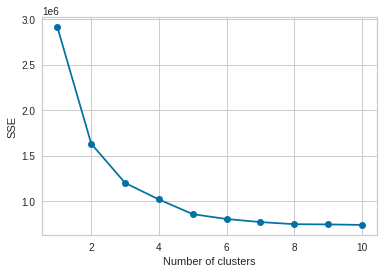

In [79]:
# calculate Sum of Squared Errors (SSE), also called distorsions, for a range of number of cluster - with df scaled with StandardScaler + PCA
sse = []
for i in range(1, 11):
    k_medoid = KMedoids(
        n_clusters=i, init='random',
        max_iter=300,
        random_state=0
    )
    k_medoid.fit(dataset_)
    sse.append(k_medoid.inertia_)

# plot
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

**obserations:**

* After running the K-Means model with the a normalised dataset, a standardised dataset, and a PCA with 4 components (with standardised scaling) we can see that the optimal number of clusters is still 3 with different levels of inertia. Two clusters could also be considered as per results of dataset after PCA.

### Optimal number of clusters (Silhouette Method)

#### With standardised data



In [80]:
# calculate Silhoutte Score - stardardised
score = silhouette_score(df_standard_, k_medoid.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)
# A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. 

Silhouette Score: -0.059


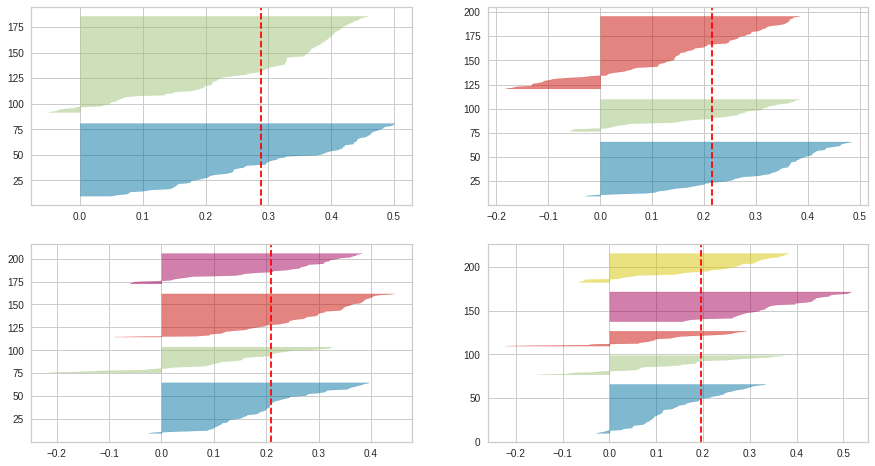

In [81]:
fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    k_medoid = KMedoids(n_clusters=i, init= 'random', method='pam', max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)
    
    #create visualiser
    visualizer = SilhouetteVisualizer(k_medoid, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_standard_)

#### With normalised data

In [82]:
# Calculate Silhoutte Score - normalised
score = silhouette_score(df_minmax_, k_medoid.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

# # A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. 

Silhouette Score: 0.131


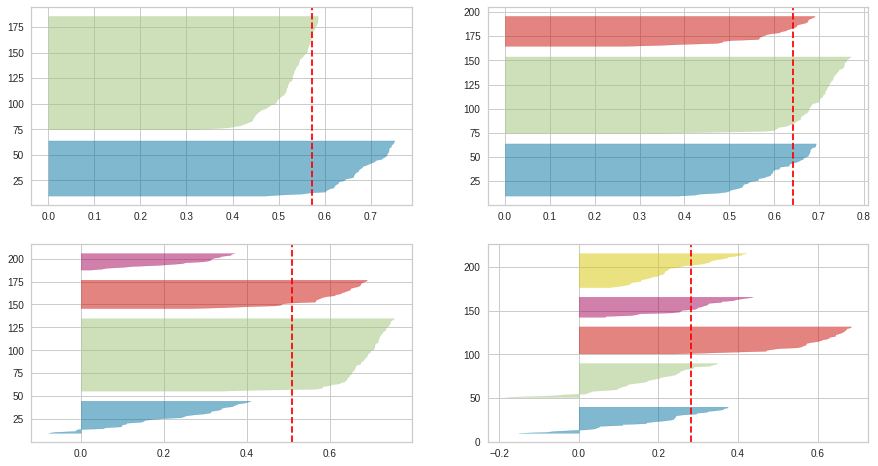

In [83]:
fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    k_medoid = KMedoids(n_clusters=i, init= 'random', max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)
    
    #create visualiser
    visualizer = SilhouetteVisualizer(k_medoid, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_minmax_)

#### With standardised data + PCA

In [84]:
# Calculate Silhoutte Score - stardardised + PCA
score = silhouette_score(dataset_, k_medoid.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

# A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. 

Silhouette Score: 0.042


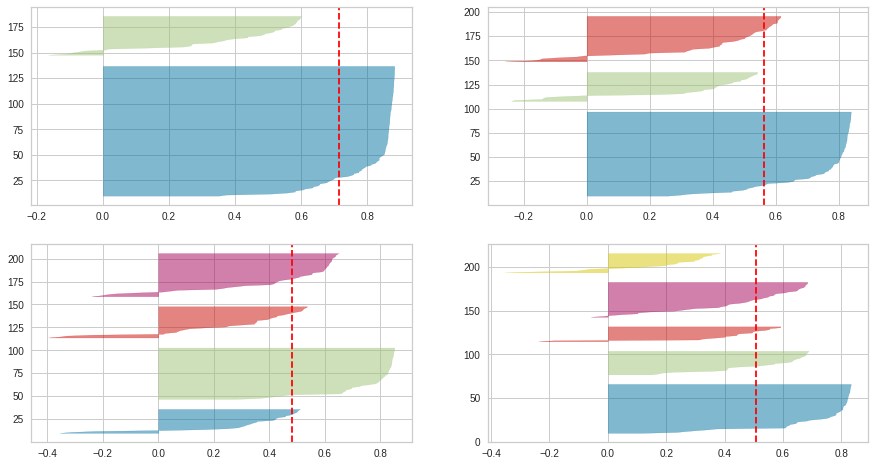

In [85]:
fig,ax = plt.subplots(2,2, figsize = (15,8))
for i in [2,3,4,5]:

    # create kmeans instance for different numbers of clusters
    k_medoid = KMedoids(n_clusters=i, init= 'random', method='pam', max_iter = 300, random_state = 0)
    q, mod = divmod(i,2)
    
    #create visualiser
    visualizer = SilhouetteVisualizer(k_medoid, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(dataset_)

**Findings**

Silhouette Scores are very close to 0 indicating that clusters are overlapping. An increase in clusters (to 5 for example) shows that there are negative values in the scale, meaning that this n of clusters might have samples that have been assigned to the wrong cluster.

### Medoids analysis

####Medoids plotting and visualisation

#### Visualise clusters by feature, scaled data with StandardScaler (standardisation)

In [86]:
df_standard_.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  medoid  
0   1.902882 -0.679180       0  
1  -0.859973 -0.485623       1  
2  -0.038404 -0.465376       0  
3   2.128151 -0.516268       0  
4  -0.541946 -0.041817       1

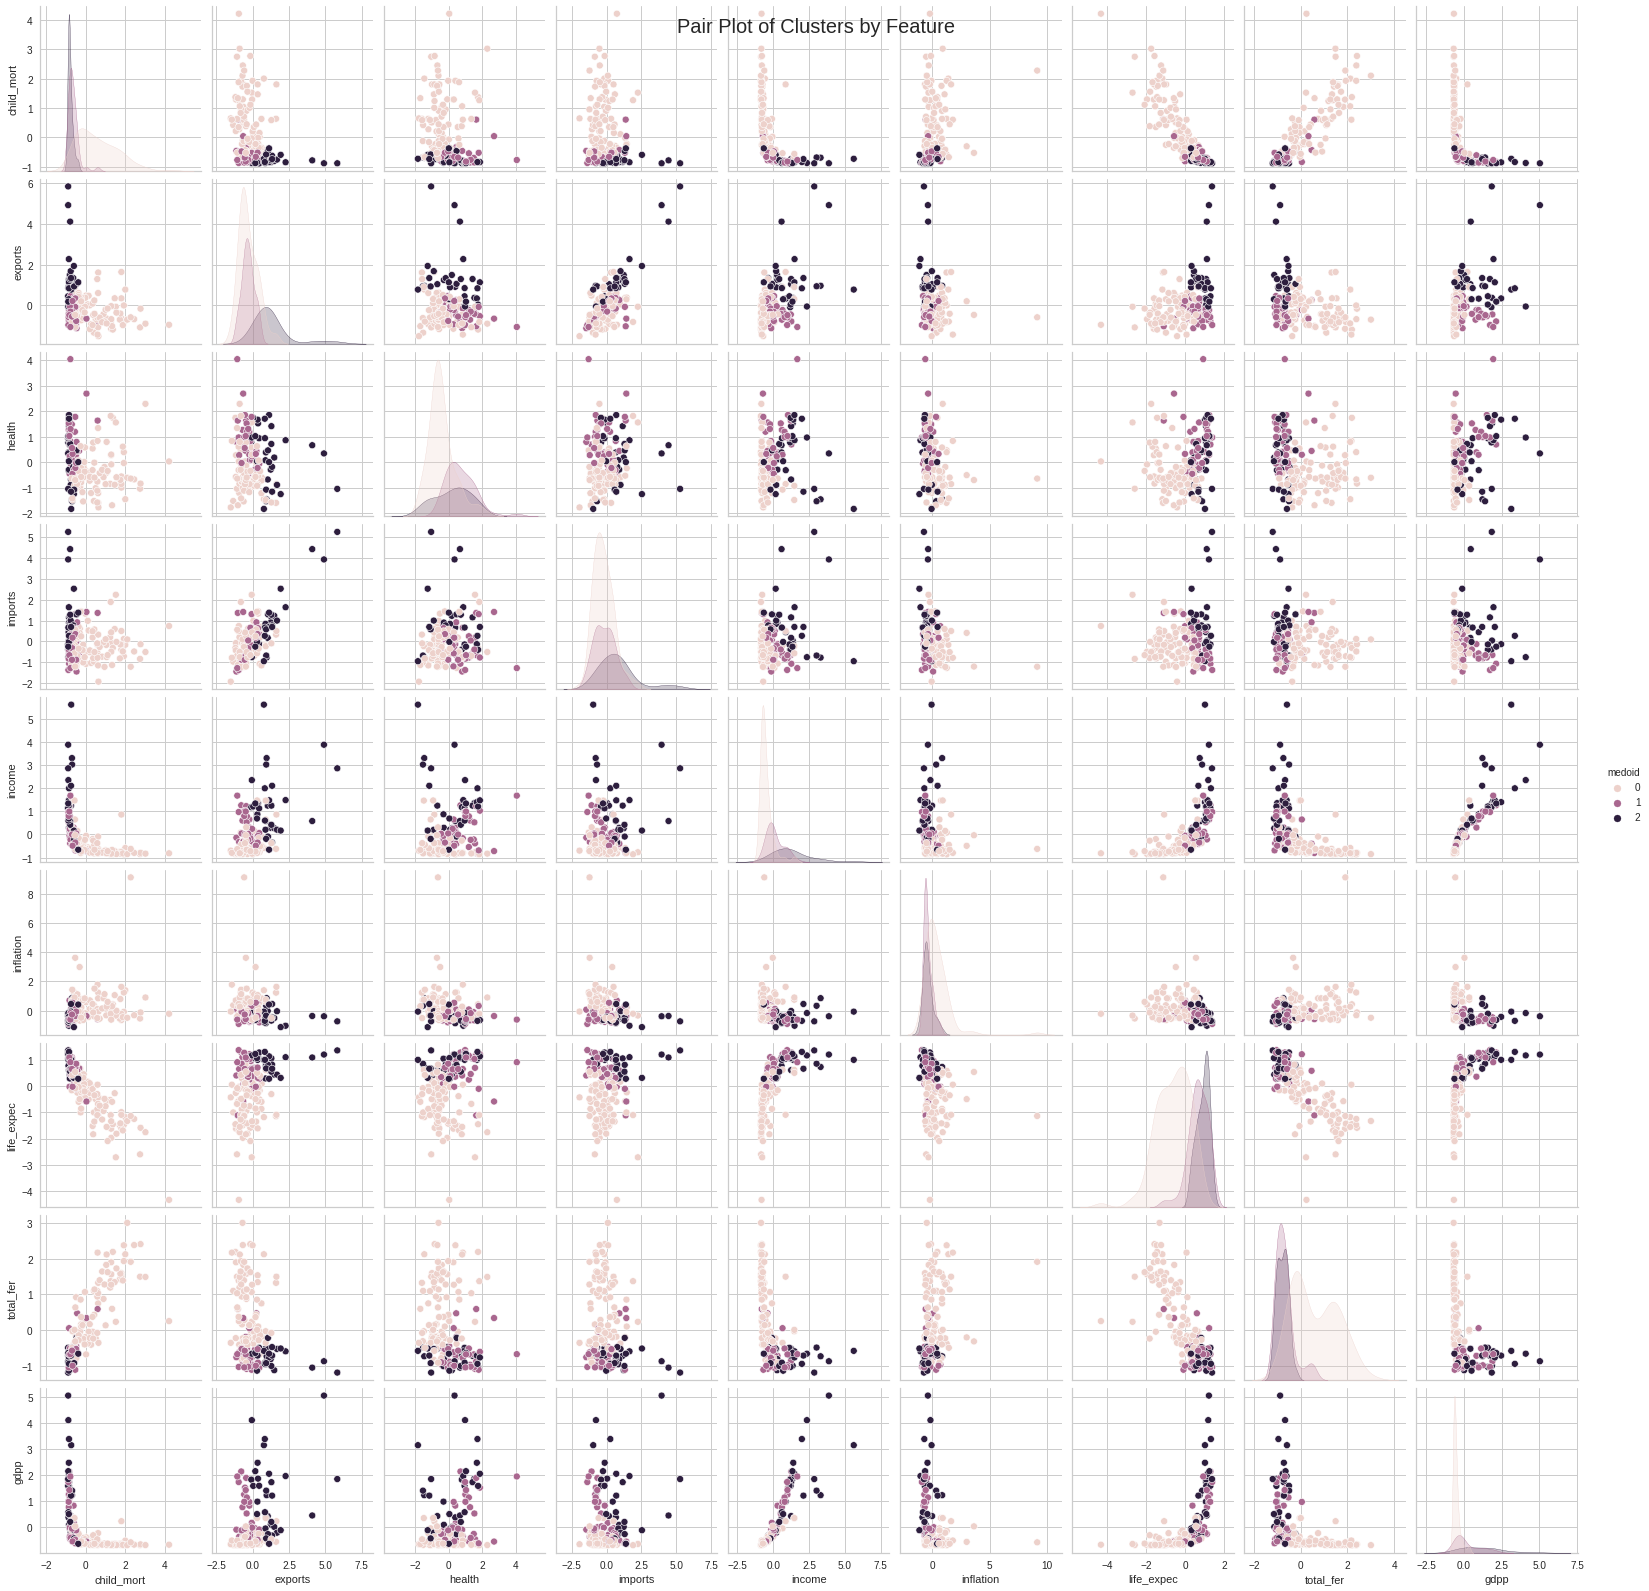

In [87]:
# plot
sns.pairplot(df_standard_, hue="medoid")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

#### Visualise Medoids by feature, scaled data with MinMaxScaler (normalisation)

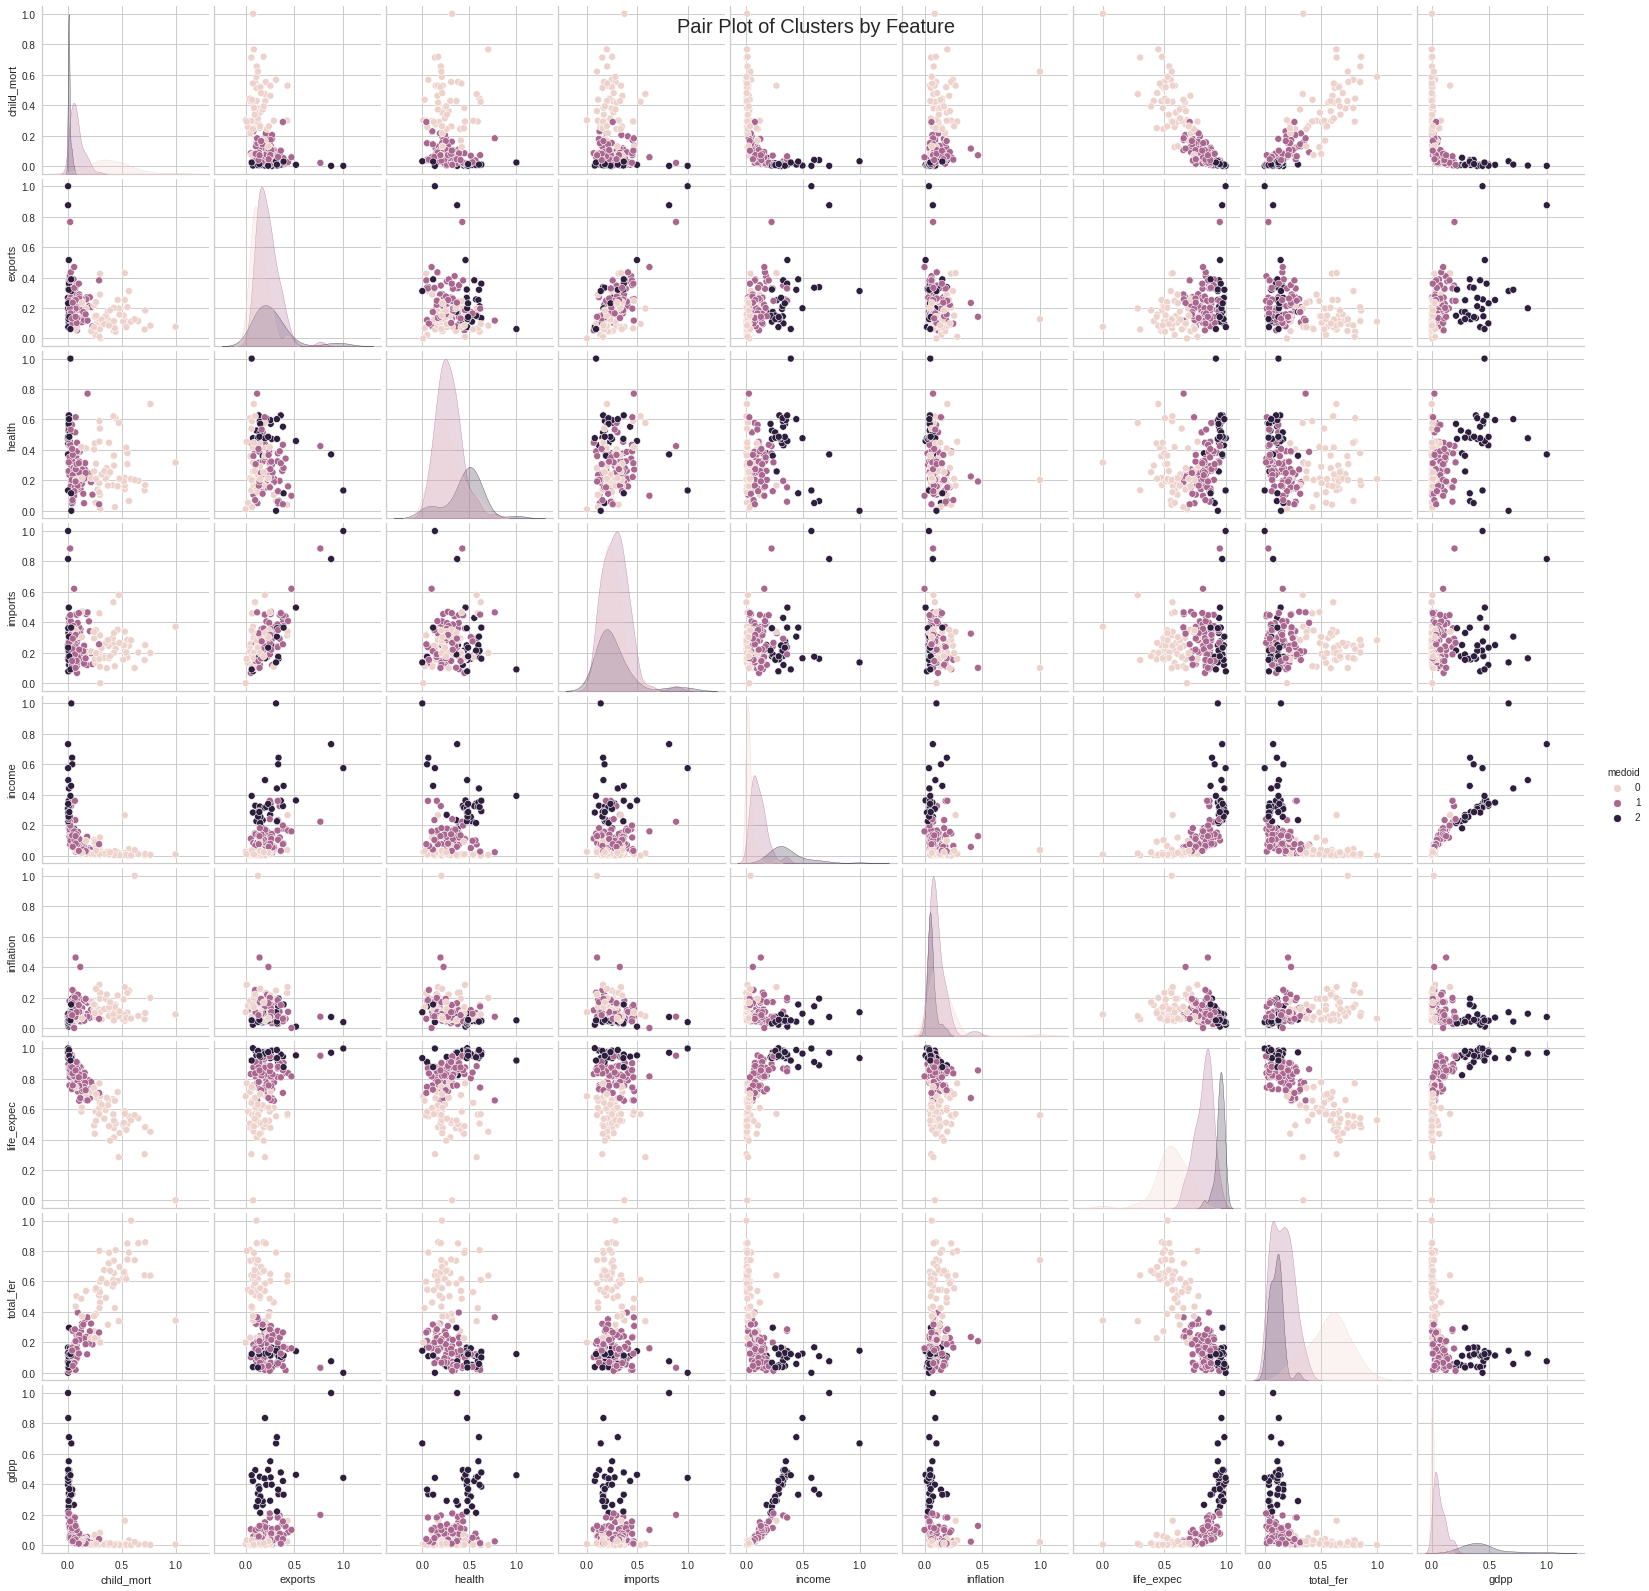

In [88]:
# plot
sns.pairplot(df_minmax_, hue="medoid")
# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

#### Visualise Medoids by feature, scaled data with StandardScaler and with reduction of features with PCA

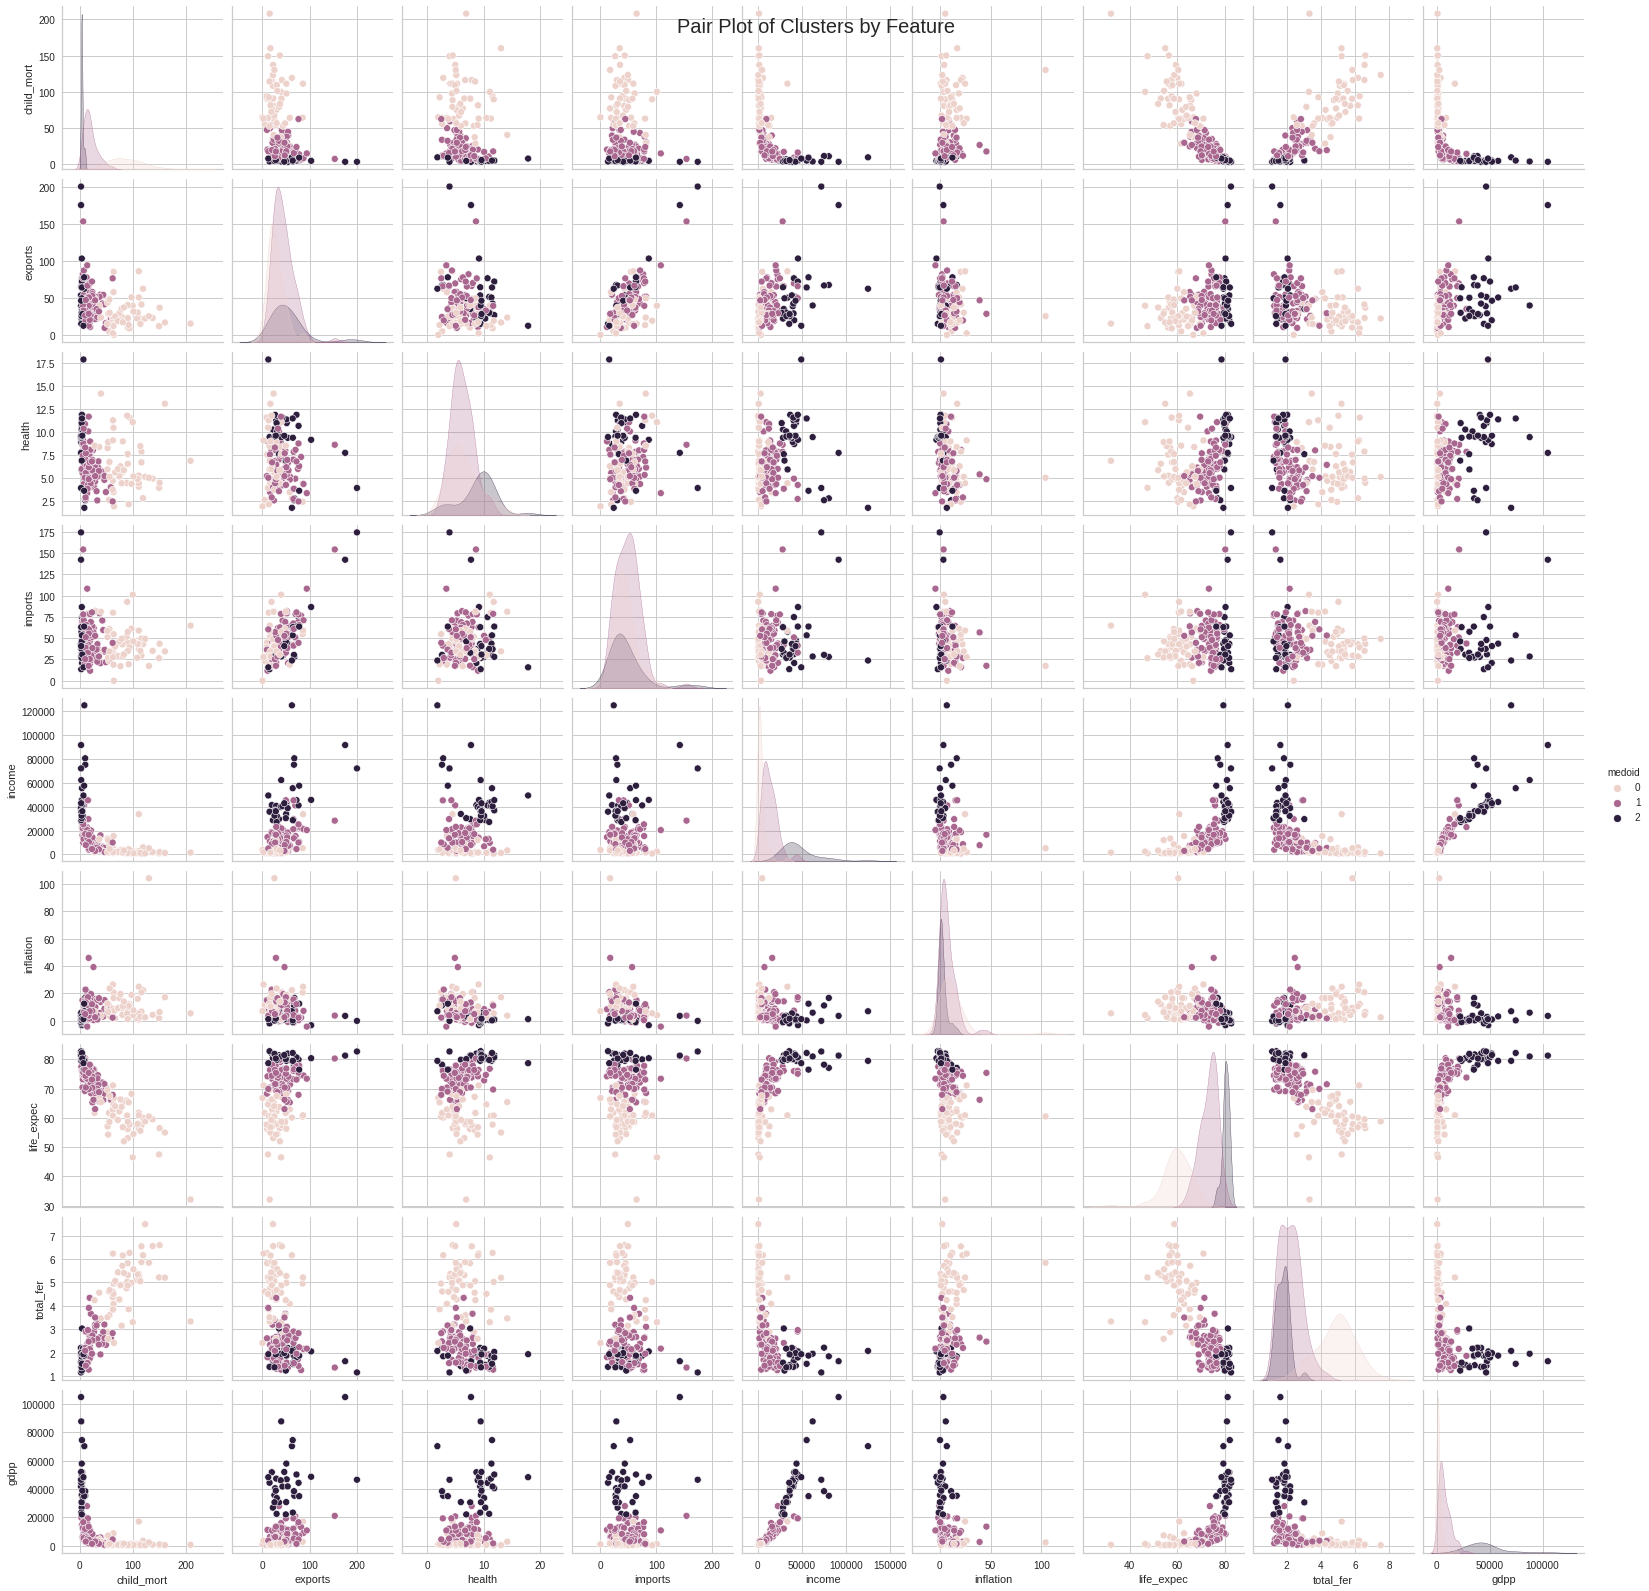

In [89]:
# plot
sns.pairplot(dataset_, hue="medoid")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

**observation: **

* After running the model with 2 types of scaling and using PCA, we can see there tends to be overlapping between clusters.
Cluster 2 is more spread out and clusters 0 and 1 tend to overlap.

### Medoids characteristics

In [90]:
# add cluster column to original dataset with countries and non-scaled values
data['medoid'] = y_predicted_standard.tolist()
# data

#### Visualise Medoids by feature, original data with no scaling

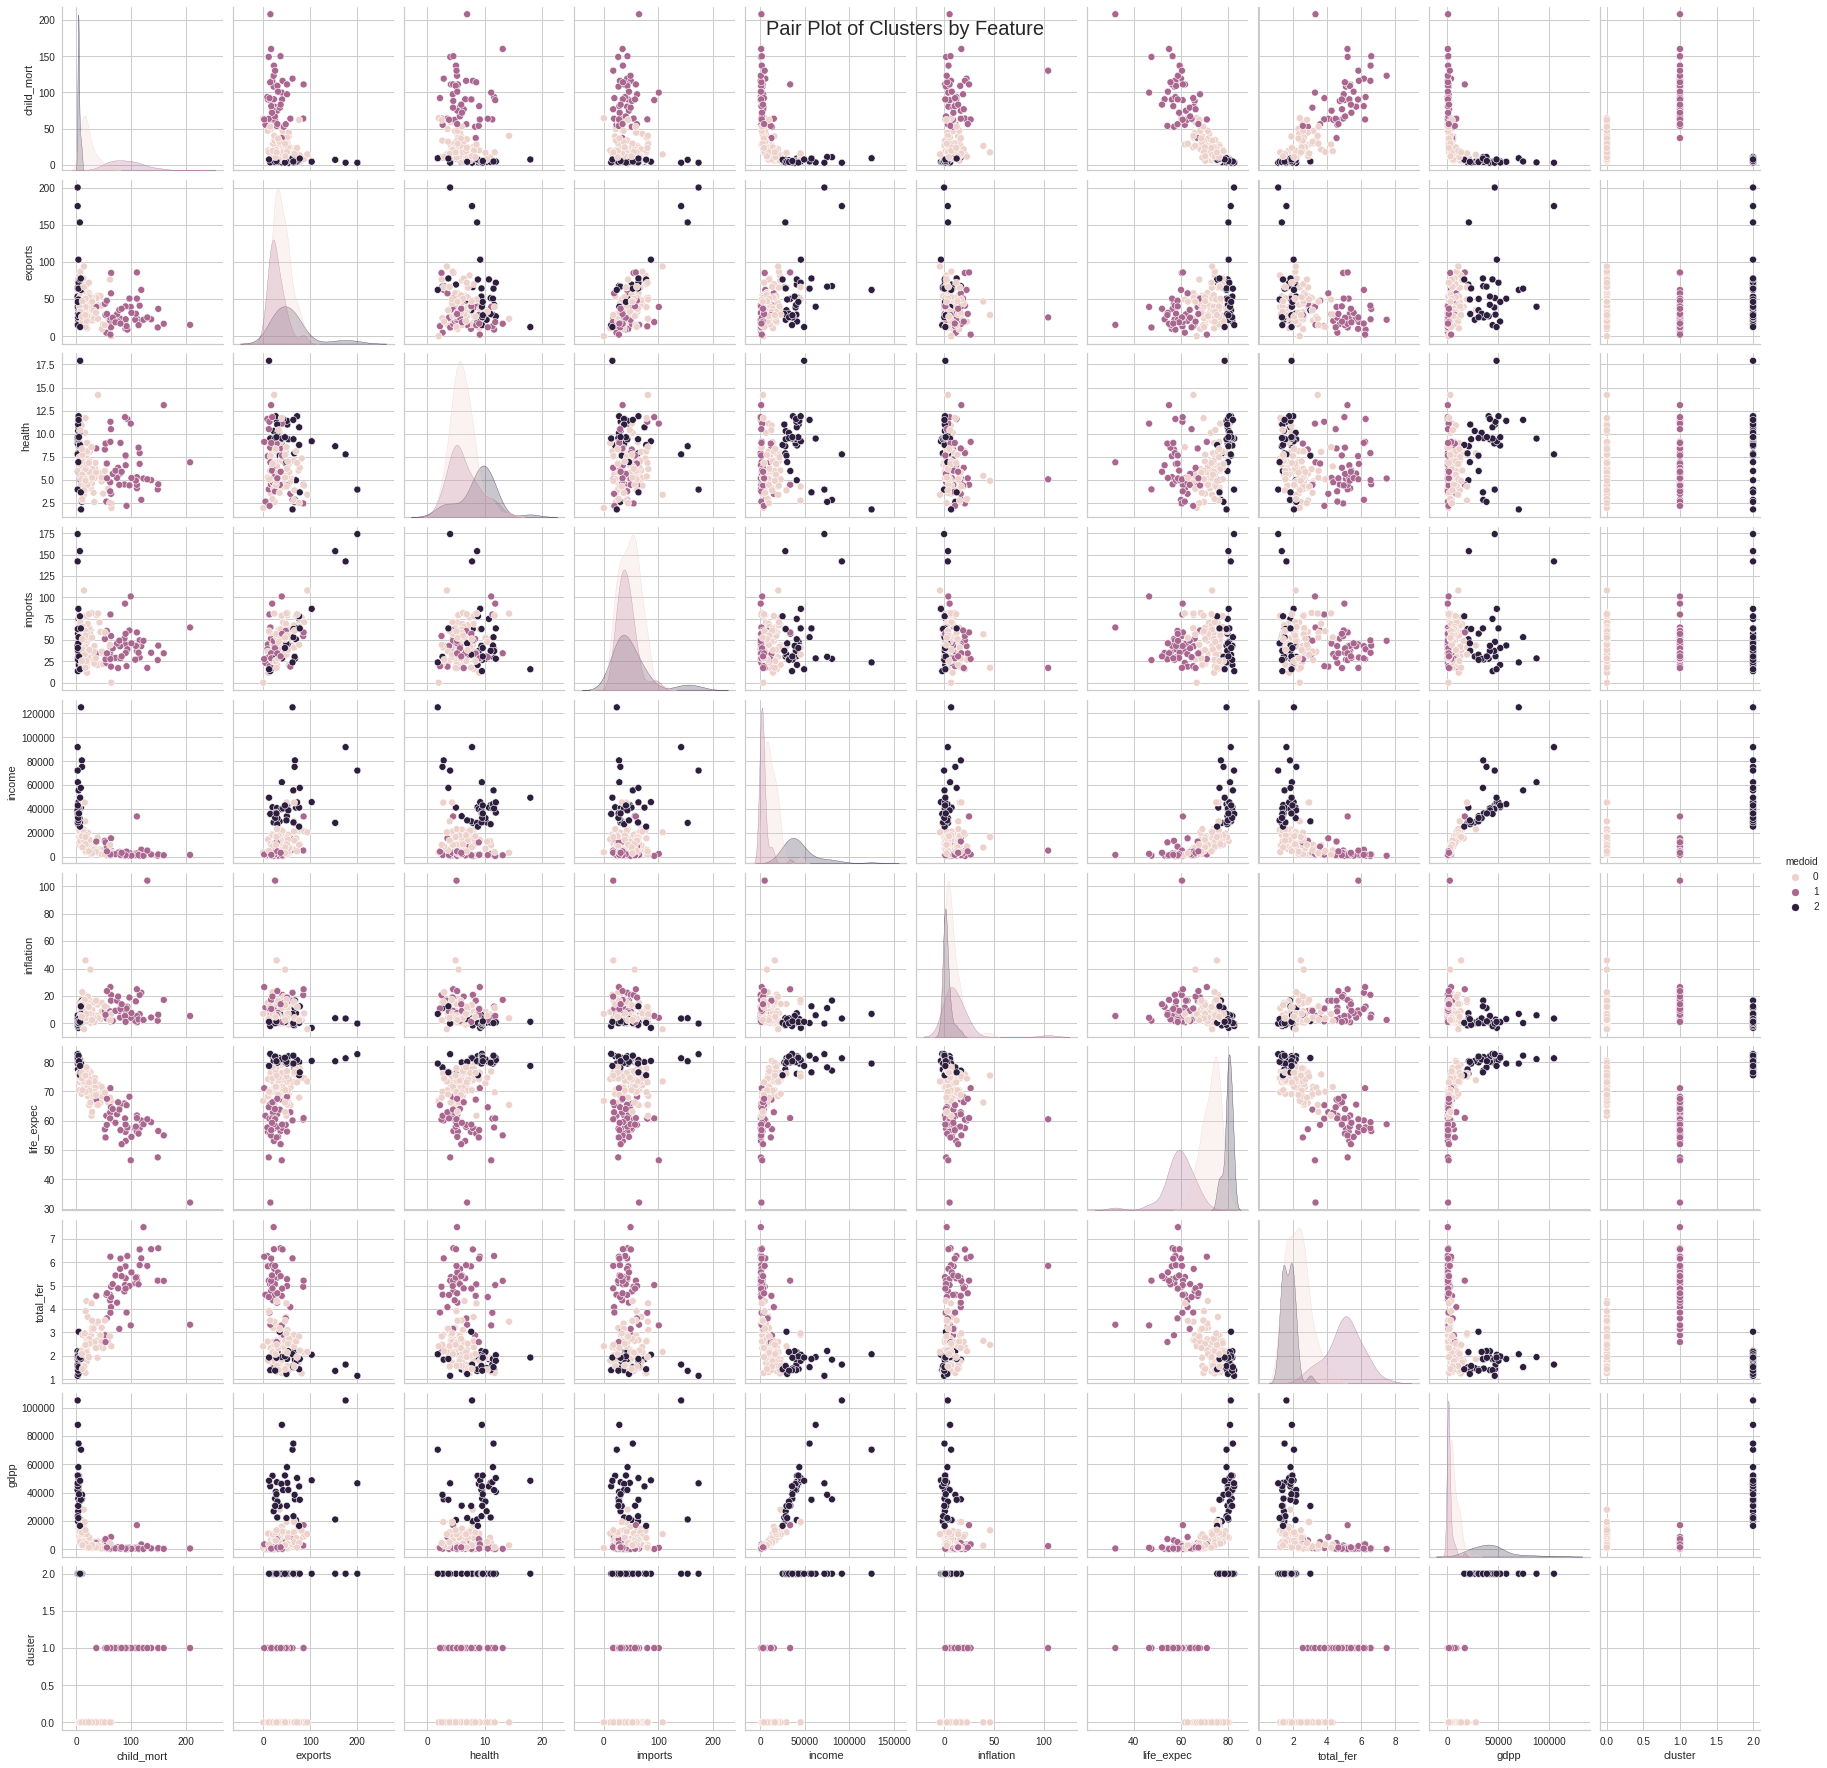

In [91]:

# plot
sns.pairplot(data, hue="medoid")

# title
plt.suptitle('Pair Plot of Clusters by Feature', 
             size = 20);

### Medoids descriptions

In [92]:
# table of clusters showing mean values per cluster and per feature
Medoids_table = pd.pivot_table(data, index=['medoid'])
# Medoids_table

In [93]:
# cluster 0 
Medoids_0 = data.loc[data['medoid'] == 0]

# list of countries in this country
# Medoids_0.country.unique()

In [94]:
# cluster 1 
Medoids_1 = data.loc[data['medoid'] == 1]

# list of countries in this country
# Medoids_1.country.unique()

In [95]:
# cluster 2 
Medoids_2 = data.loc[data['medoid'] == 2]

# list of countries in this country
# Medoids_2.country.unique()

### Clusters and their location in the world

In [96]:
# load example data from geodataframe 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world.head()

In [97]:
# # look at country names from gpd list
# print(sorted(world['name'].unique()))

# # look at country names for analysis list
# print(sorted(data['country'].unique()))

In [98]:
# compare 2 lists to idenitfy country names that need to be adjusted
world_list=sorted(world['name'].unique())
data_list = sorted(data['country'].unique())

list_difference = []
for item in world_list:
  if item not in data_list:
    list_difference.append(item)

# print(list_difference)

In [99]:
# update names on world gdp dataset to match with df
world['name'] = world['name'].replace(
    ['Bosnia and Herz.', 'Central African Rep.', 'Congo', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Dominican Rep.', 'Eq. Guinea', 'Macedonia', 'Myanmar', 'N. Cyprus', 'S. Sudan', 'Slovakia', 'Solomon Is.', 'United States of America'],
    ['Bosnia and Herzegovina','Central African Republic','Congo, Rep.',"Cote d'Ivoire",'Congo, Dem. Rep.','Dominican Republic','Equatorial Guinea','Macedonia, FYR','Myanmar','Cyprus','Sudan','Slovak Republic','Solomon Islands','United States'])

# check output
# world.name.unique()

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


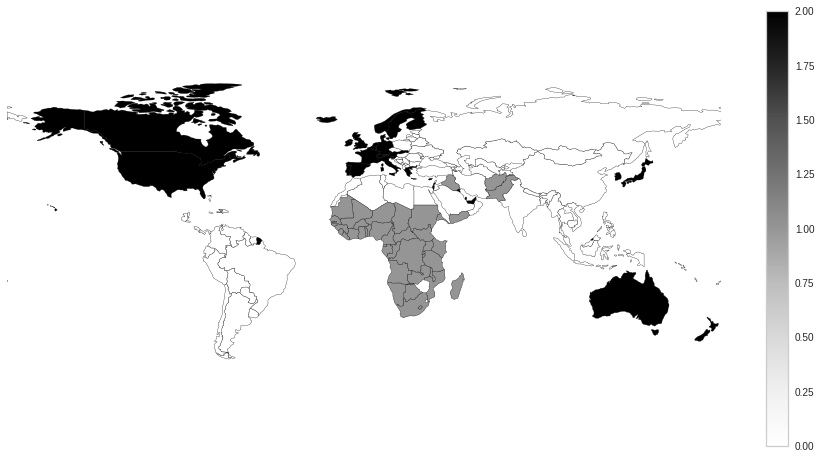

In [100]:
# change column name
world_copy = world.copy()
world_copy.rename(columns = {'name' : 'country'}, inplace = True)
world_copy.head()

# append geodataframe data with data_combined data
world_data = pd.merge(
        data,
        world_copy,
        on='country',
        how= 'inner'
)

# convert df into geodf
world_data = gdf(world_data)

# plot 
medoids = world_data['cluster']


# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world_data, 
    hue=medoids,
    cmap='Greys', 
    figsize=(16, 8),
    legend = True
)

**observation:**

* Countries in Cluster 2 (characterised by showing really strong or positive values such as good economic development, high life expectancy, low child mortality) are located in North America, Europe, Oceania and a couple in Asia. 
* Countries in Cluster 1 (characterised by having the most negative values: high child mortality, lowest economic development) are located across Africa and Asia.
* Countries in Cluster 0 (characterised by showing average values for all features when comparing with other clusters) are located across South America, parts of Africa, Europe and Asia.

Blank spaces (like Mexico) are of countries with no available data.

## **Results**


* The clustering method alone was not sufficient to provide a final recommendation, however it did contribute to guide actions for further analysis and explore the data in more detail. 

* Further analysis could be done by adding more features related to the context and constraints that the recommended countries might be facing, or systemic challenges that could hinder funding value.

## References


**K-Means Model**

* https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

* https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7

* https://developer.squareup.com/blog/so-you-have-some-clusters-now-what/


**Visualisations &silhoutte score**

* https://towardsdatascience.comvisualizing-data-with-pair-plots-in-python-f228cf529166

https://towardsdatascience.com/mastering-the-bar-plot-in-python-4c987b459053


* https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html



**Libraries and Code**


* https://seaborn.pydata.org/generated/seaborn.load_dataset.html

* https://seaborn.pydata.org/generated/seaborn.pairplot.html

* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

* https://geopandas.org/docs/user_guide/mapping.html

**PCA**

* https://builtin.com/data-science/step-step-explanation-principal-component-analysis

* https://online.stat.psu.edu/stat505/lesson/11/11.4











